In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


<span style="font-size: 1.5em;">LOADING AND CLEANING DATA</span>


Here we load our dataset and store it in a dataframe. Our data has columns on year, origin, destination, carrier and passengers between 2000-2020

In [3]:
csv_file_path = '/users/preyasigaur/Desktop/International_Report_Passengers.csv'
pass_travel_data = pd.read_csv(csv_file_path)


print(pass_travel_data.head())

     data_dte  Year  Month  usg_apt_id usg_apt  usg_wac  fg_apt_id fg_apt  \
0  07/01/2004  2004      7       14747     SEA       93      16229    YVR   
1  11/01/2008  2008     11       11697     FLL       33      12010    GUA   
2  10/01/2002  2002     10       10257     ALB       22      16271    YYZ   
3  03/01/2007  2007      3       12889     LAS       85      13165    MAN   
4  03/01/2009  2009      3       12892     LAX       91      13252    MEX   

   fg_wac  airlineid carrier  carriergroup        type  Scheduled  Charter  \
0     906      19687      QX             1  Passengers      19265        0   
1     127      20416      NK             1  Passengers       3099        0   
2     936      20206      QK             0  Passengers         33        0   
3     493      19541      BD             0  Passengers       3815        0   
4     148      19534      AM             0  Passengers      17993        0   

   Total  
0  19265  
1   3099  
2     33  
3   3815  
4  17993  


In [4]:
print(pass_travel_data.columns)

Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')


In [5]:
columns_to_drop = ['data_dte', 'Month', 'usg_apt_id', 'usg_wac', 'fg_apt_id', 'fg_wac', 'carriergroup', 'Scheduled', 'Charter', 'type']
pass_travel_data_clean = pass_travel_data.drop(columns=columns_to_drop)

In [6]:
pass_travel_data_clean = pass_travel_data.sort_values(by= 'Year')

In [7]:
pass_travel_data_20_years = pass_travel_data_clean[(pass_travel_data_clean['Year'] >= 2000) & (pass_travel_data_clean['Year'] <= 2020)]

print(pass_travel_data_20_years)

          data_dte  Year  Month  usg_apt_id usg_apt  usg_wac  fg_apt_id  \
480348  05/01/2000  2000      5       12173     HNL        2      13744   
479824  07/01/2000  2000      7       14761     SFB       33      10568   
488519  10/01/2000  2000     10       13930     ORD       41      10752   
480408  02/01/2000  2000      2       14843     SJU        3      15084   
489920  01/01/2000  2000      1       13303     MIA       33      12010   
...            ...   ...    ...         ...     ...      ...        ...   
694648  02/01/2020  2020      2       13303     MIA       33      13269   
696948  03/01/2020  2020      3       12266     IAH       74      12010   
591462  06/01/2020  2020      6       13303     MIA       33      14030   
591461  06/01/2020  2020      6       11298     DFW       74      11032   
586790  01/01/2020  2020      1       15412     TYS       54      13625   

       fg_apt  fg_wac  airlineid carrier  carriergroup        type  Scheduled  \
480348    NRT     

In [8]:
pass_travel_data_20_years

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
480348,05/01/2000,2000,5,12173,HNL,2,13744,NRT,736,19791,NH,0,Passengers,8422,0,8422
479824,07/01/2000,2000,7,14761,SFB,33,10568,BFS,493,20377,X9,1,Passengers,0,345,345
488519,10/01/2000,2000,10,13930,ORD,41,10752,BRU,409,19529,SN,0,Passengers,12004,0,12004
480408,02/01/2000,2000,2,14843,SJU,3,15084,SXM,264,20422,SY,1,Passengers,0,458,458
489920,01/01/2000,2000,1,13303,MIA,33,12010,GUA,127,20203,FCQ,1,Passengers,0,50,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694648,02/01/2020,2020,2,13303,MIA,33,13269,MGA,153,19574,TA,0,Passengers,7378,0,7378
696948,03/01/2020,2020,3,12266,IAH,74,12010,GUA,127,21161,09Q,1,Passengers,0,256,256
591462,06/01/2020,2020,6,13303,MIA,33,14030,PBM,379,20422,SY,1,Passengers,0,149,149
591461,06/01/2020,2020,6,11298,DFW,74,11032,CUN,148,20422,SY,1,Passengers,2451,0,2451


In [9]:
pass_travel_data_20_years_cleaned = pass_travel_data_20_years.groupby(['Year', 'usg_apt', 'fg_apt']).agg({
    'airlineid': list,
    'carrier': list,
    'Total': 'sum'
}).reset_index()

pass_travel_data_20_years_cleaned.columns = ['Year', 'USGateway', 'ForeignGateway', 'AirlineID', 'CarrierCode', 'Passengers']

print(pass_travel_data_20_years_cleaned)

       Year USGateway ForeignGateway  \
0      2000       ABE            YYZ   
1      2000       ABI            ACA   
2      2000       ABI            BJX   
3      2000       ABI            CUN   
4      2000       ABI            MTY   
...     ...       ...            ...   
69422  2020       ZZZ            SAQ   
69423  2020       ZZZ            SML   
69424  2020       ZZZ            TCB   
69425  2020       ZZZ            YWH   
69426  2020       ZZZ            YYJ   

                                               AirlineID  \
0                                                [20355]   
1                                                [19805]   
2                                                [19805]   
3                                                [19805]   
4                                  [19805, 19805, 19805]   
...                                                  ...   
69422  [21743, 21743, 21743, 21743, 21743, 21743, 217...   
69423                                  

<span style="font-size: 1.5em;">ELEMENTARY ANALYSIS</span>



We create a directed multigraph where airports are nodes, flights are directed edges, and each edge has associated attributes such as the number of passengers and the unique carrier name. The edges are differentiated by the year of the flight.

In [10]:
traveler_graph = nx.from_pandas_edgelist(pass_travel_data_20_years_cleaned, source='USGateway', target='ForeignGateway', edge_key='Year', edge_attr=['Passengers', 'CarrierCode'], create_using=nx.MultiDiGraph())

Analysing the traveling trends between John F. Kennedy International Airport (JFK) and Athens International Airport (ATH), we see a general decreasing travel trend until mid - 2012 after which it picks up. Notably there is a steep decline around 2001 (due to 9/11) and 2010 (due to the Greek Economic Crisis).

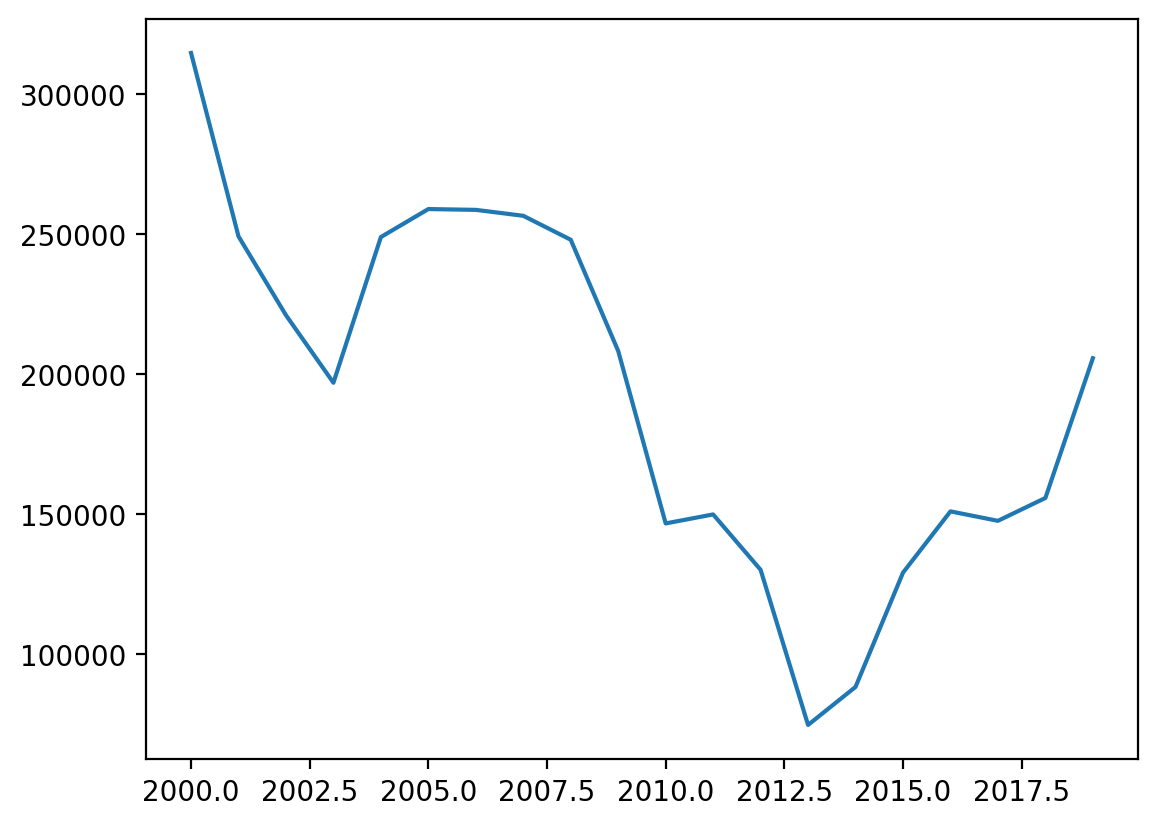

In [11]:
values = [(year, attr['Passengers']) for year, attr in traveler_graph['JFK']['ATH'].items()]
x, y = zip(*values)
plt.plot(x, y)
plt.show()

Now we see the passenger travelling patterns from John F. Kennedy International Airport(JFK) to Sheremetyevo - A.S. Pushkin International Airport(SVO) in Moscow. Notice the general increasing trend but also the sharp decline after 2018.5, consistent with the end of the FIFA Men's World Cup, the subsequent decline in diplomatic relations, and the COVID-19 Pandemic.

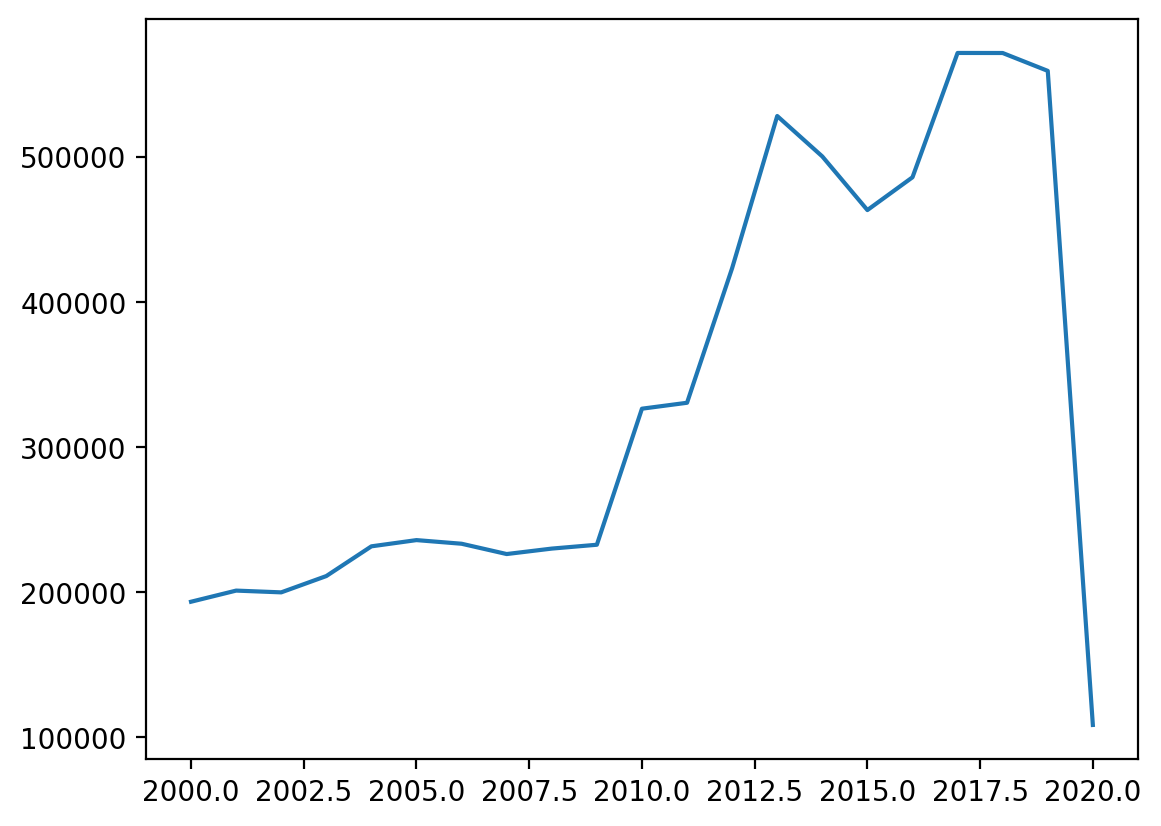

In [12]:
values = [(year, attr['Passengers']) for year, attr in traveler_graph['JFK']['SVO'].items()]
x, y = zip(*values)
plt.plot(x, y)
plt.show()


Notice the difference between the travelling patterns in the above two graphs. The first graph (JFK - ATH) shows a sharp decline right after 2001 and 2010, while the second graph (JFK - SVO) shows a sharp decrease right after 2018.

<span style="font-size: 1.5em;"> CUMULATIVE GROWTH IN PASSENGERS AIR-TRAVELING </span>

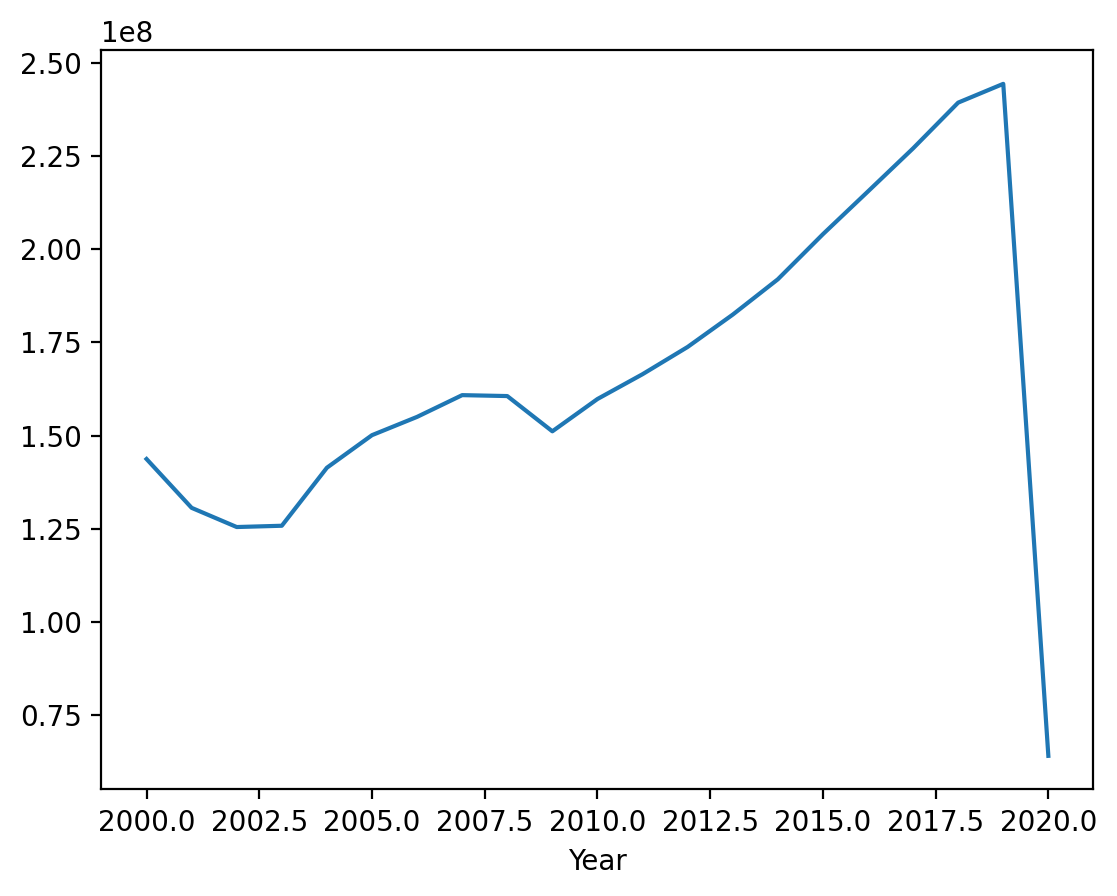

In [13]:
pass_travel_data_20_years_cleaned.groupby(['Year']).sum()['Passengers'].plot()
plt.show()

We can see that there is a general increasing trend in passengers travelling through flight between 2000 and 2010, with some decrease registered in 2001 (9/11), 2008 (Great Recession). Notably there is a major decline in passengers travelling internationally in 2020, consistent with the COVID-19 Pandemic.

<span style="font-size: 1.5em;">GENERAL PASSENGER STATISTICS ANALYSIS</span>


Idnetifying rows with the maximum number of passengers for that year

In [14]:
temp = pass_travel_data_20_years_cleaned.groupby(['Year'])['Passengers'].transform(max) == pass_travel_data_20_years_cleaned['Passengers']

Identifying the most travelled routes of 2000 and 2020 respectively

In [15]:
pass_travel_data_20_years_cleaned[temp][pass_travel_data_20_years_cleaned.Year.isin([2000, 2020])]

,Year,USGateway,ForeignGateway,AirlineID,CarrierCode,Passengers
1169,2000,JFK,LHR,"[19616, 19540, 19533, 19977, 19532, 19805, 198...","[KU, BA, AI, UA, AF, AA, AA, BA, VS, BA, BA, A...",2870008
67720,2020,JFK,LHR,"[19540, 19682, 19805, 19790, 19540, 19682, 197...","[BA, VS, AA, DL, BA, VS, DL, AA, BA, BA, AA, B...",643374


Most travelled route in 2000:  John F. Kennedy International Airport to London Heathrow International Airport <br>
Most travelled route in 2020:  John F. Kennedy International Airport to London Heathrow International Airport

Thus, the most travelled route in both 2000 and 2020 is between New York to London. This could be due to the popularity of the route but also the various connection flights through it, as our dataset is only considering non stop flights.

Let's track this route over 2000 to 2020

<Axes: xlabel='Year'>

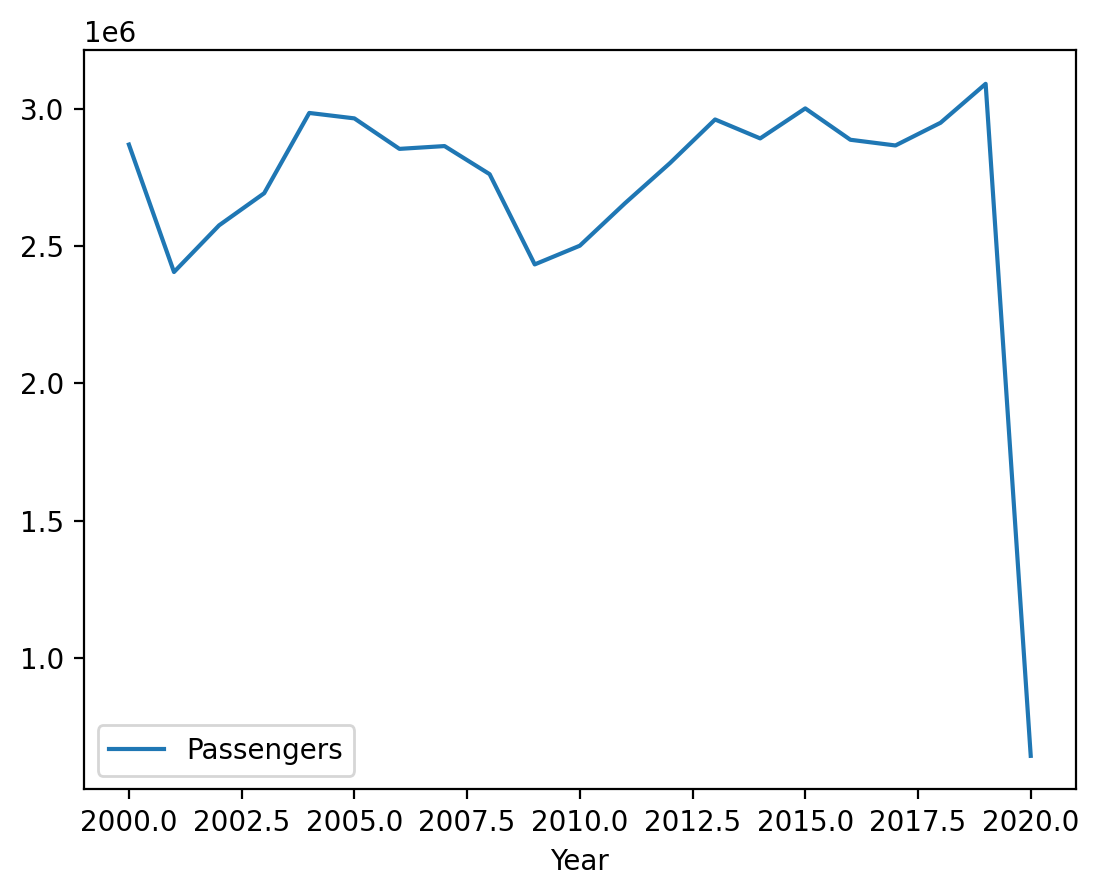

In [16]:
pass_travel_data_20_years_cleaned[(pass_travel_data_20_years_cleaned['USGateway'] == 'JFK') & (pass_travel_data_20_years_cleaned['ForeignGateway'] == 'LHR')].plot('Year', 'Passengers')


We see an overall increasing trend from 2000-2019, until the sharp decline because of the COVID-19 pandemic.

<span style="font-size: 1.5em;">MULTIGRAPH FOR 2019</span>

We extract edges for a particular year from a MultiGraph. The edge also has two new attributes, weight and weight_inv; weight is the number of passengers and weight_inv the inverse of it.

In [17]:
def year_network(G, year):
    year_network = nx.Graph()
    for edge in G.edges:
        source, target, edge_year = edge
        if edge_year == year:
            attr = G[source][target][edge_year]
            year_network.add_edge(
                source, target,
                weight=attr['Passengers'],
                weight_inv=1/(attr['Passengers']
                if attr['Passengers'] != 0.0 else 1),
                airlines=attr['CarrierCode'])
    return year_network

In [18]:
travel_2019 = year_network(traveler_graph, 2019)
print(travel_2019)

Graph with 945 nodes and 4505 edges


Thus for the 2019 traveler graph we have 945 locations and 4505 directed edges between them.

<span style="font-size: 1.5em;">GRAPHING THE AIRPORTS</span>

In [19]:
txt_file_path = '/Users/preyasigaur/Desktop/GlobalAirportDatabase.txt'

lat_long = pd.read_csv(txt_file_path, delimiter=':', header=None)

lat_long.columns = [
    "CODE4",
    "CODE3",
    "CITY",
    "PROVINCE",
    "COUNTRY",
    "UNKNOWN1",
    "UNKNOWN2",
    "UNKNOWN3",
    "UNKNOWN4",
    "UNKNOWN5",
    "UNKNOWN6",
    "UNKNOWN7",
    "UNKNOWN8",
    "UNKNOWN9",
    "LATITUDE",
    "LONGITUDE"
]

wanted_nodes = list(travel_2019.nodes())

us_airports = lat_long.query("CODE3 in @wanted_nodes").drop_duplicates(subset=["CODE3"]).set_index("CODE3")


In [20]:
no_gps = []
for n, d in travel_2019.nodes(data=True):
    try:
        travel_2019.nodes[n]["longitude"] = us_airports.loc[n, "LONGITUDE"] 
        travel_2019.nodes[n]["latitude"] = us_airports.loc[n, "LATITUDE"]
        travel_2019.nodes[n]["degree"] = travel_2019.degree(n)

    except KeyError:
        no_gps.append(n)

has_gps = set(travel_2019.nodes()).difference(no_gps)
g = travel_2019.subgraph(has_gps)

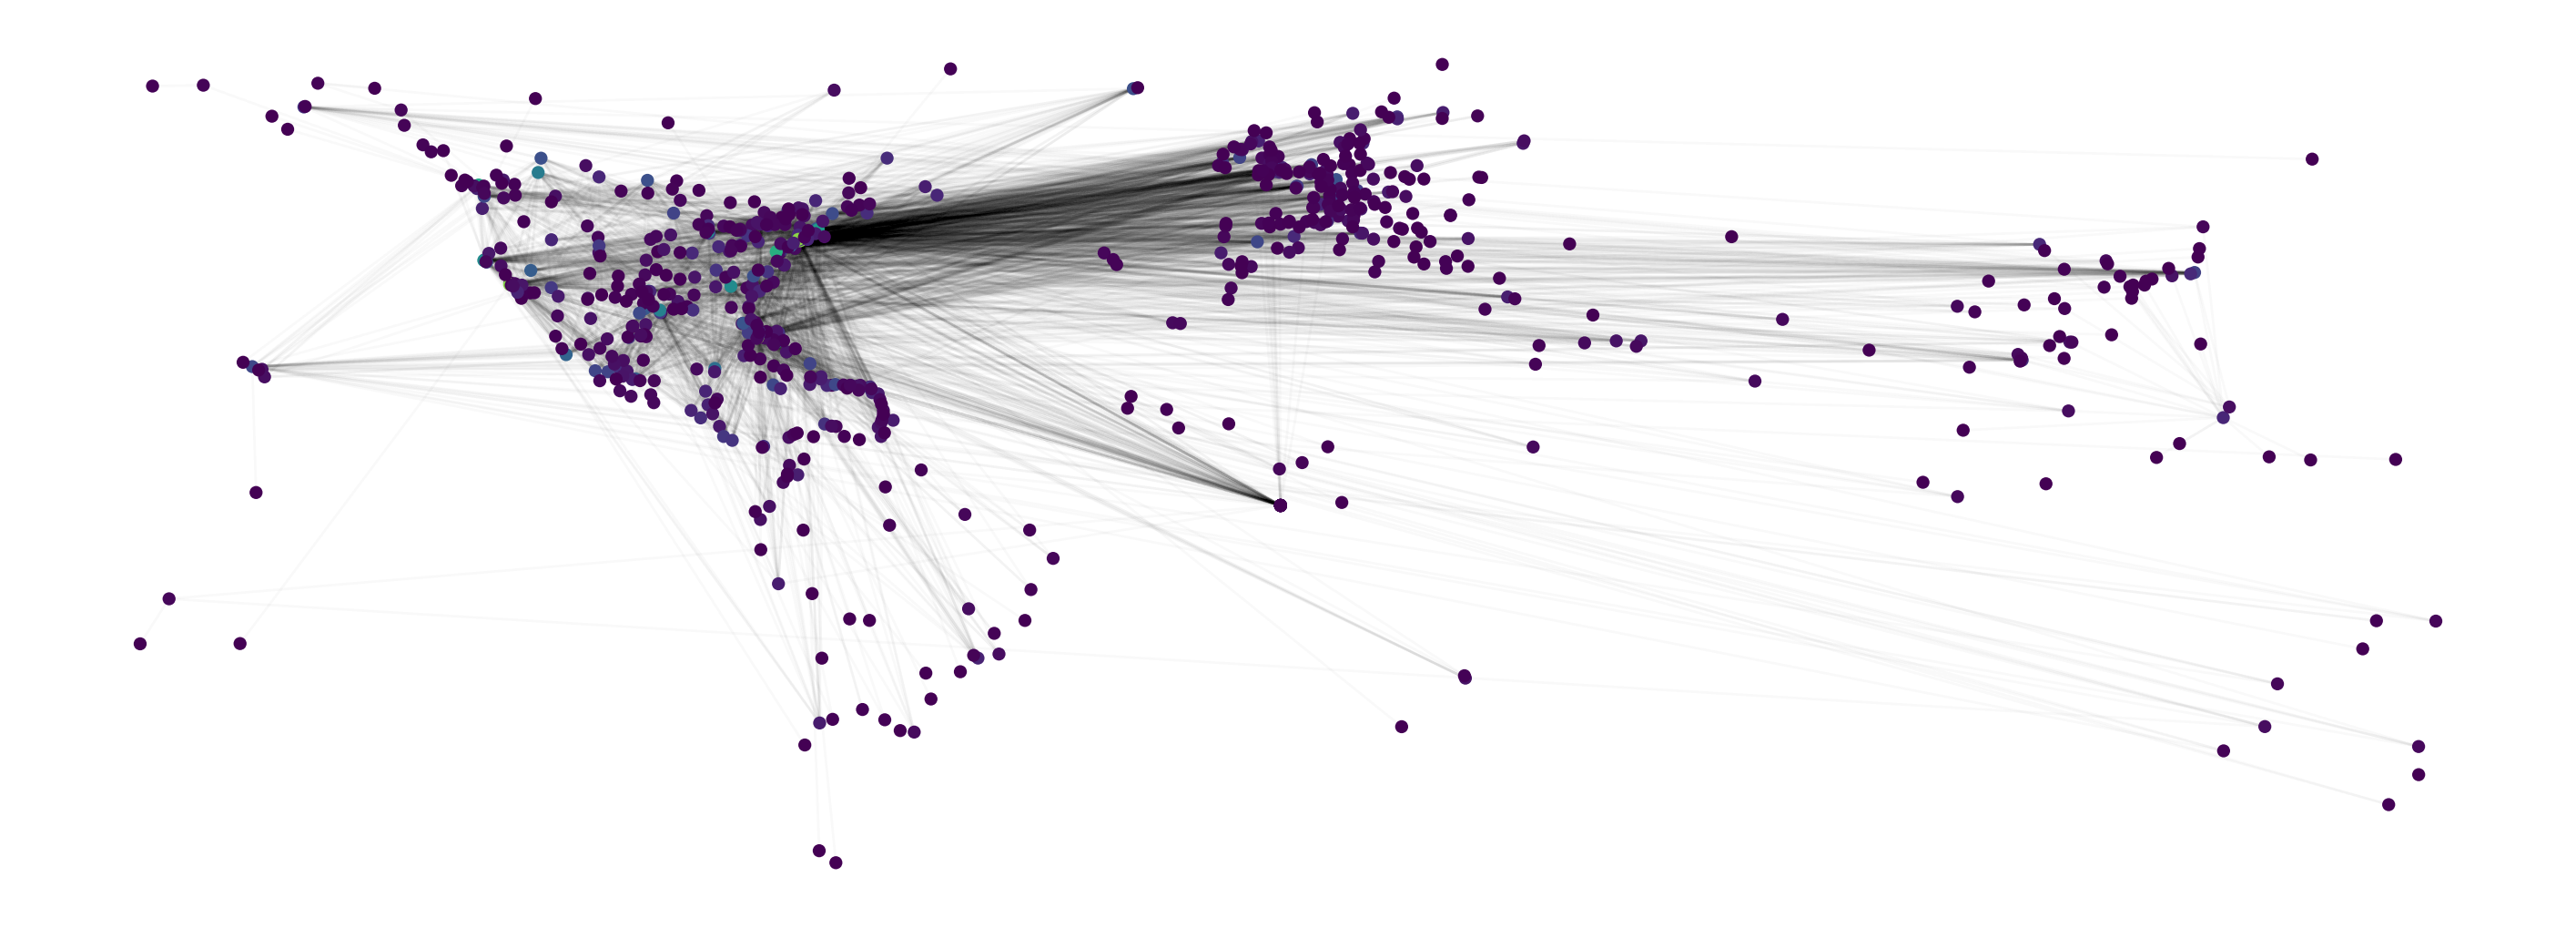

In [21]:
import nxviz as nv
from nxviz import nodes, plots, edges, annotate
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 9))

pos = nodes.geo(g, color_by="degree", encodings_kwargs={"size_scale": 1})
edges.line(g, pos, encodings_kwargs={"alpha_scale": 0.1})

plots.aspect_equal()
plots.despine()

plt.show()


<span style="font-size: 1.5em;">NETWORK ANALYSIS I</span><br>
Here we calculate the unweighted Page Rank, Betweenness Centrality and Degree Centrality to find the key airports


Page Rank: 
As airports function as nodes, the algorithm considers connectivity strength between them as edges, providing an importance score to each. This score reflects an airport's centrality and influence in the broader network, aiding in the identification of key hubs. Higher PageRank indicates greater importance. Airports with higher PageRank scores are considered more important in the network. This importance is not solely based on the number of connections (degree) but also on the importance of the airports connecting to them.

Betweenness Centrality: Betweenness centrality is a measure of the significance of a node (e.g., an airport) within a network, based on the number of shortest paths that pass through it. In the context of an airline network, it identifies crucial airports that act as key connectors or transit points between various destinations. A high betweenness centrality indicates an airport is frequently used on the shortest routes connecting other airports, signifying its strategic importance for efficient travel and network flow. 


Degree Centrality:
Degree centrality is crucial in assessing airport connectivity within a network. In the context of airports, it measures the number of direct flight connections to and from a specific airport. 

In [22]:
top_10_pr = sorted(nx.pagerank(travel_2019, weight=None).items(), key=lambda x:x[1], reverse=True)[:10]

In [23]:
top_10_bc = sorted(nx.betweenness_centrality(travel_2019, weight=None).items(), key=lambda x:x[1], reverse=True)[:10]

In [24]:
top_10_dc = sorted(nx.degree_centrality(travel_2019).items(), key=lambda x:x[1], reverse=True)[0:10]

In [25]:
top_10_pr

[('YYZ', 0.02262742582865457),
 ('TEB', 0.018282304968608006),
 ('MIA', 0.017567667039658376),
 ('LAX', 0.01605235982346988),
 ('JFK', 0.01580107549393157),
 ('YVR', 0.013234617870591726),
 ('EWR', 0.012521802263911721),
 ('IAD', 0.011556191427412543),
 ('FLL', 0.01106120815237252),
 ('YUL', 0.00994356085085434)]

In [26]:
top_10_bc

[('YYZ', 0.17659886660153953),
 ('TEB', 0.1094954603339084),
 ('YVR', 0.10305880777025342),
 ('MIA', 0.09584936884442159),
 ('LAX', 0.09032132327298648),
 ('JFK', 0.07722086961651974),
 ('FLL', 0.05413909880188381),
 ('EWR', 0.053497600623489024),
 ('IAD', 0.0489264186664726),
 ('YUL', 0.04665226802941868)]

In [27]:
top_10_dc

[('YYZ', 0.20021186440677965),
 ('MIA', 0.17584745762711865),
 ('TEB', 0.1652542372881356),
 ('JFK', 0.1641949152542373),
 ('LAX', 0.1641949152542373),
 ('EWR', 0.1408898305084746),
 ('IAD', 0.1260593220338983),
 ('YVR', 0.11970338983050847),
 ('FLL', 0.11652542372881355),
 ('BOS', 0.11016949152542373)]

We see that the page rank, degree centrality and betweenness centrality for Toronto Pearson International Airport (Canada) (YYZ), Miami International Airport (MIA) and Teterboro Airport (TEB) feature prominently while major airports like John F Kennedy International Airport (JFK) and Los Angeles International Airport (LAX) feature lower.is the highest, but in the top 10 we also see airports like Fort Lauderdale (FLL) etc. Are they the most important airports in the network? 
YYZ, MIA and TEB are essential to the core structure of the network and there are flights from other major airports to these airports which explains the high scores.

<span style="font-size: 1.2em;">Weighted Metrics</span> <br>
Here we calculate the weighted Page Rank, Betweenness Centrality and Degree Centrality to find the key airports

In [28]:
sorted(nx.pagerank(travel_2019, weight='weight').items(), key=lambda x:x[1], reverse=True)[0:10]

[('JFK', 0.04973693114264754),
 ('LAX', 0.03827506229996278),
 ('MIA', 0.03589368371018434),
 ('YYZ', 0.034931451953438754),
 ('EWR', 0.023343886498343153),
 ('LHR', 0.022350140405510744),
 ('SFO', 0.02097228561984244),
 ('ORD', 0.020217637256112485),
 ('ATL', 0.018495907357322622),
 ('FLL', 0.017423074594195103)]

In [29]:
sorted(nx.betweenness_centrality(travel_2019, weight='weight').items(), key=lambda x:x[1], reverse=True)[0:10]

[('TEB', 0.15755467766472128),
 ('LBG', 0.13787197069187665),
 ('YYZ', 0.11844776743607573),
 ('PBI', 0.1099654200450106),
 ('FLL', 0.09064391818252808),
 ('LAX', 0.08915409789468415),
 ('IAD', 0.0862363588206898),
 ('YVR', 0.08443568668890837),
 ('SFO', 0.0817403997615119),
 ('HPN', 0.078257651063012)]

The weighted PageRank in airline networks proves to be insightful, particularly as it elevates the prominence of major airports like JFK (John F. Kennedy International Airport) and LAX (Los Angeles International Airport). This approach accounts for the strength and significance of connections, not just their existence. Consequently, larger hubs like JFK and LAX, known for their high passenger volumes and numerous international and domestic connections, are assigned greater importance. This reflects their critical roles in the network, serving as essential nodes for a significant portion of air traffic flow.

The weighted betweenness centrality can indeed highlight smaller airports like TEB (Teterboro Airport) and LBG (Paris–Le Bourget Airport) prominently, which might otherwise be overlooked in traditional analyses focusing only on passenger volume or flight frequency. This metric considers not just the number of paths through an airport, but also the significance of those paths, often weighted by factors like flight frequency, capacity, or distance. Consequently, smaller airports can emerge as critical nodes if they serve as crucial links in the network—connecting major hubs or providing efficient routes for specific high-demand destinations. 

<span style="font-size: 1.2em;">Analysing The Metrics For The Best and Worst Airports for International Travel</span> <br>

Now according to Scott's Report, these are the best and worst US airports for international flights. Let's analyse their page ranks and degree centralities and how they compare to the whole network.

In [30]:
top_10_airports = ['JFK', 'BOS', 'IAD', 'LAX', 'ORD', 'EWR', 'MIA', 'SFO', 'MCO', 'RDU']

bottom_10_airports = ['HNL', 'FAT', 'OKC', 'BOI', 'LGB', 'TUS', 'ECP', 'OAK', 'CAK', 'ORH']

In [31]:
pagerank_values = nx.pagerank(travel_2019, weight=None)
print("PageRank for Top 10 Airports for International Travel:")
for airport in top_10_airports:
    rank = pagerank_values.get(airport, 0)
    print(f"{airport}: {rank}")
print("\nPageRank for Bottom 10 Airports for International Travel:")
for airport in bottom_10_airports:
    rank = pagerank_values.get(airport, 0)
    print(f"{airport}: {rank}")

PageRank for Top 10 Airports for International Travel:
JFK: 0.01580107549393157
BOS: 0.009683404135744728
IAD: 0.011556191427412543
LAX: 0.01605235982346988
ORD: 0.007675890230920686
EWR: 0.012521802263911721
MIA: 0.017567667039658376
SFO: 0.008706820626651915
MCO: 0.008136784345540816
RDU: 0.0024517835186683356

PageRank for Bottom 10 Airports for International Travel:
HNL: 0.0063564278126786436
FAT: 0.000934816823396579
OKC: 0.0005974790925166956
BOI: 0.0003494937765448344
LGB: 0.0003222242076196356
TUS: 0.0013909654900992907
ECP: 0
OAK: 0.002623201727759576
CAK: 0.00033569378376585715
ORH: 0


In [32]:
sorted_centrality = sorted(pagerank_values.items(), key=lambda x: x[1], reverse=True)

top_10_airports = ['JFK', 'BOS', 'IAD', 'LAX', 'ORD', 'EWR', 'MIA', 'SFO', 'MCO', 'RDU']
bottom_10_airports = ['HNL', 'FAT', 'OKC', 'BOI', 'LGB', 'TUS', 'ECP', 'OAK', 'CAK', 'ORH']

# Find and print the rank of each specified airport
for airport in top_10_airports:
    rank = next((i for i, v in enumerate(sorted_centrality) if v[0] == airport), None)
    print(f"Top 10 Airports for International Travel (cheapest): {airport}, Rank: {rank + 1 if rank is not None else 'Not found'}")
print()
for airport in bottom_10_airports:
    rank = next((i for i, v in enumerate(sorted_centrality) if v[0] == airport), None)
    print(f"Bottom 10 Airports for International Travel (costliest): {airport}, Rank: {rank + 1 if rank is not None else 'Not found'}")


Top 10 Airports for International Travel (cheapest): JFK, Rank: 5
Top 10 Airports for International Travel (cheapest): BOS, Rank: 11
Top 10 Airports for International Travel (cheapest): IAD, Rank: 8
Top 10 Airports for International Travel (cheapest): LAX, Rank: 4
Top 10 Airports for International Travel (cheapest): ORD, Rank: 16
Top 10 Airports for International Travel (cheapest): EWR, Rank: 7
Top 10 Airports for International Travel (cheapest): MIA, Rank: 3
Top 10 Airports for International Travel (cheapest): SFO, Rank: 12
Top 10 Airports for International Travel (cheapest): MCO, Rank: 14
Top 10 Airports for International Travel (cheapest): RDU, Rank: 85

Bottom 10 Airports for International Travel (costliest): HNL, Rank: 21
Bottom 10 Airports for International Travel (costliest): FAT, Rank: 251
Bottom 10 Airports for International Travel (costliest): OKC, Rank: 371
Bottom 10 Airports for International Travel (costliest): BOI, Rank: 563
Bottom 10 Airports for International Travel (co

According to the pagerank standings, we see that the best airports feature prominently at the top of the standings and have high pageranks. 

In [33]:
degree_centrality_values = nx.degree_centrality(travel_2019)
print("Degree Centrality for Top 10 Airports for International Travel:")
for airport in top_10_airports:
    centrality = degree_centrality_values.get(airport, 0)
    print(f"{airport}: {centrality}")
print("\nDegree Centrality for Bottom 10 Airports for International Travel:")
for airport in bottom_10_airports:
    centrality = degree_centrality_values.get(airport, 0)
    print(f"{airport}: {centrality}")

Degree Centrality for Top 10 Airports for International Travel:
JFK: 0.1641949152542373
BOS: 0.11016949152542373
IAD: 0.1260593220338983
LAX: 0.1641949152542373
ORD: 0.09427966101694915
EWR: 0.1408898305084746
MIA: 0.17584745762711865
SFO: 0.09745762711864407
MCO: 0.09745762711864407
RDU: 0.03072033898305085

Degree Centrality for Bottom 10 Airports for International Travel:
HNL: 0.04449152542372881
FAT: 0.00847457627118644
OKC: 0.005296610169491525
BOI: 0.00211864406779661
LGB: 0.00211864406779661
TUS: 0.014830508474576272
ECP: 0
OAK: 0.029661016949152543
CAK: 0.00211864406779661
ORH: 0


In [34]:
sorted_centrality = sorted(degree_centrality_values.items(), key=lambda x: x[1], reverse=True)

for airport in top_10_airports:
    rank = next((i for i, v in enumerate(sorted_centrality) if v[0] == airport), None)
    print(f"Top Airports: {airport}, Rank: {rank + 1 if rank is not None else 'Not found'}")
print()
for airport in bottom_10_airports:
    rank = next((i for i, v in enumerate(sorted_centrality) if v[0] == airport), None)
    print(f"Bottom Airports: {airport}, Rank: {rank + 1 if rank is not None else 'Not found'}")

Top Airports: JFK, Rank: 4
Top Airports: BOS, Rank: 10
Top Airports: IAD, Rank: 7
Top Airports: LAX, Rank: 5
Top Airports: ORD, Rank: 15
Top Airports: EWR, Rank: 6
Top Airports: MIA, Rank: 2
Top Airports: SFO, Rank: 13
Top Airports: MCO, Rank: 12
Top Airports: RDU, Rank: 79

Bottom Airports: HNL, Rank: 44
Bottom Airports: FAT, Rank: 254
Bottom Airports: OKC, Rank: 354
Bottom Airports: BOI, Rank: 526
Bottom Airports: LGB, Rank: 575
Bottom Airports: TUS, Rank: 167
Bottom Airports: ECP, Rank: Not found
Bottom Airports: OAK, Rank: 81
Bottom Airports: CAK, Rank: 533
Bottom Airports: ORH, Rank: Not found


According to the degree centrality standings, we see that the best airports feature prominently at the top of the standings and have high degree centralities. 

<span style="font-size: 1.5em;">NETWORK ANALYSIS II</span><br>
Here we see the connectivity of the network

In [35]:
nx.average_shortest_path_length(travel_2019)

NetworkXError: Graph is not connected.

This implies that the graph is not connected... how does that make sense though? Let's investigate

Let's check the number of weakly connected components i.e. a weakly connected component is a group of nodes where there is a path (not necessarily directed) from any node to any other node, ignoring the direction of the edges. Essentially, we consider the underlying undirected graph formed by ignoring the direction of the edges.

In [ ]:
connected_components = list(nx.connected_components(travel_2019))

giant_component = max(connected_components, key=len)

G_giant = travel_2019.subgraph(giant_component)


In [ ]:
for c in G_giant:
    print(c)
    

ABE
YOW
NAS
YUL
CUN
LBG
ABI
MTY
YYC
DGO
ABQ
YVR
PVR
CUU
GDL
ACT
TRC
ACY
YYZ
AUA
MBJ
DUB
LRM
ADW
TLV
AEX
KIN
SAL
PAP
SDQ
GUA
SAP
BOG
GYE
MGA
DKR
AGS
FAB
MHH
ALB
YHZ
YQB
TXL
SNN
YHU
YTZ
OPO
PSA
VCE
AMA
ANC
FRA
HKG
KIX
NRT
PEK
PKC
PVG
TPE
YEG
YXY
CTS
ICN
MNL
NGO
YQU
HND
OKJ
CAN
CJU
GMP
KEF
MUC
SZX
TSA
CTU
HAN
APF
GHC
YSB
AXA
BYJ
ELH
SAQ
YGK
YXU
ZRH
ATL
AMS
BCN
BDA
BJX
BON
BRU
CDG
CZM
EZE
FCO
FPO
GCM
GIG
GRU
IST
JNB
LGW
LIM
LIR
MAD
MAN
MEX
MXP
PLS
PTY
PUJ
SCL
SJD
SJO
STR
UVF
YQX
YYR
ANU
SKB
SXM
LOS
BZE
GGT
HAV
LHR
STI
CPH
DUS
MVD
RTB
UIO
QRO
TGU
TLC
GND
LTN
BWE
CTG
DOH
BHD
KLU
AUS
PBC
OAX
POS
TAM
SLP
AGU
MLM
ARN
BMA
BLQ
TIJ
AVP
BDL
LIS
FKB
BED
BRN
GVA
YWG
SMA
YQA
AGP
ERF
LPL
NHT
BHX
PMI
AAR
ACC
AGH
BLL
BSL
CTA
CWL
DSS
EXT
FDH
GOA
GOT
LEJ
LUX
MLH
NUE
TFS
YHM
YRQ
BFI
YAZ
YBL
YYJ
YCD
PPT
YQQ
YCG
ATH
CIA
CSL
FAO
LPA
LYN
MRS
NAN
NCE
RTS
SIR
YHD
BGR
HEL
STN
CAI
TER
VKO
NAP
YQM
YYT
BOM
EDI
ANR
YCL
KIV
EMD
HUY
JMK
JTR
SMV
BHM
BIL
BIS
BNA
YMX
YYG
YPQ
NTR
YQR
BOI
BOS
BGI
CUR
PDL
POP
GLA
SFJ
RAI
OSL


Thus we see that there are 3 weakly connected components in our network. Let's analyse the components with 2 and 1 entries respectively. The second component has 2 nodes, suggesting a smaller, isolated portion. The third component has 1 node, indicating a single node that is not connected to any other nodes in the weak sense.


In [ ]:
print(components[1])
print(components[2])
print(components[3])

{'GKE', 'OSN', 'EDF'}
{'AID', 'AEP'}
{'TRK', 'MDD'}


But Elmendorf Air Force Base, Anchorage (EDF), Geilenkirchen Air Base, Geilenkirchen, Germany (GKE), Osan Air Base, Pyeongtaek, South Korea (OSN) are airbases so it makes sense that they are only connected to each other but not to the whole network. 

The flight between Aeroparque Jorge Newbery, Buenos Aires, Argentina (AEP) and Anderson Municipal Airport, Anderson, Indiana, USA (AID) only has 2 passegers, and thus do not necessarily contribute to the passenger travel data. 

The flight between Juwata International Airport, Tarakan, Indonesia (TRK) and Airpark Dallas Airport, Dallas, Texas, USA (MDD) only has 5 passegers, and thus do not necessarily contribute to the passenger travel data. 

In [ ]:
trk_2015 = pass_travel_data_20_years_cleaned[(pass_travel_data_20_years_cleaned['Year'] == 2019) & (pass_travel_data_20_years_cleaned['ForeignGateway'] == 'TRK')]
trk_2015.head()

,Year,USGateway,ForeignGateway,AirlineID,CarrierCode,Passengers
64229,2019,MDD,TRK,[21974],[3EQ],5


In [ ]:
aep_2015 = pass_travel_data_20_years_cleaned[(pass_travel_data_20_years_cleaned['Year'] == 2019) & (pass_travel_data_20_years_cleaned['ForeignGateway'] == 'AEP')]
aep_2015.head()

,Year,USGateway,ForeignGateway,AirlineID,CarrierCode,Passengers
61681,2019,AID,AEP,[22020],[GEQ],2


Thus we can exclude these node components from our network with reason. 

In [ ]:
travel_2019.remove_nodes_from(['AEP', 'MDD', 'EDF', 'GKE', 'OSN', 'AID', 'TRK'])

After removing the weakly connected nodes with reason, let's see if the network is weakly connected or strongly. 

In [ ]:
nx.is_weakly_connected(travel_2019)

True

In [ ]:
nx.is_strongly_connected(travel_2019)

False

Thus, the network is weakly connected, which means we are just checkeing if the nodes are connected to each other and not the directedness of the edges.

Let's just see the strongly connected components of the network. A strongly connected component means a group of nodes where there is a directed path from any node to any other node, and vice versa. In a strongly connected component, every node is reachable from every other node in both directions.

In [ ]:
strong_conn = list(nx.strongly_connected_components(travel_2019))

In [ ]:
strong_conn_2019 = max(strong_conn, key=len)

In [ ]:
strong_conn_2019

{'YOW'}

In [ ]:
travel_2019_strong_network = travel_2019.subgraph(nodes=strong_conn_2019)

Now is this new network strongly connected?

In [ ]:
nx.is_strongly_connected(travel_2019_strong_network)

True

In [ ]:
len(travel_2019_strong_network)

1

In [ ]:
nx.average_shortest_path_length(travel_2019_strong_network)

0

So this new subgraph netwrok of only the maximum strongly connected nodes of the air travel in 2015, is in itself strongly connected and has 1190 nodes, with a shortest path length of ~3.18. This implies that to reach from any airport in this network to another one, we need approximately 3-4 layovers at best. This means that the network is very reachable. 

<span style="font-size: 1.5em;">NETWORK ANALYSIS IV</span><br>
Here we analyse the connectivity of specific flight carriers

In [ ]:
travel_2019['JFK']['BOM']

{'weight': 14602,
 'weight_inv': 6.848376934666484e-05,
 'airlines': ['DL', 'AI', 'AI', 'AI']}

We create a list of all the airlines between all origins and destinations in the network and then say we only want to see the connectivity for Delta Airlines (because they're the best!)

In [ ]:
def str_to_list(a):
    if isinstance(a, list):
        return a
    else:
        return a[1:-1].split(', ')

for origin, dest, attr in travel_2019.edges(data=True):
    attr['airlines_list'] = str_to_list(attr['airlines'])



In [ ]:
delta_network = nx.DiGraph()
for origin, dest, attr in travel_2019.edges(data=True):
    if 'DL' in attr['airlines_list']:
        delta_network.add_edge(
            origin, dest, 
            weight=attr['weight'])


In [ ]:
print(delta_network)


DiGraph with 208 nodes and 499 edges


We see that Delta Airlines connects 208 airports with 499 flights! 

But can we extract more characteristics about this specific flight carrier? 

In [ ]:
sorted(nx.pagerank(delta_network, weight='weight').items(),key=lambda x:x[1], reverse=True)[0:5]

[('YYZ', 0.08494934198455441),
 ('MEX', 0.03685229301217184),
 ('CUN', 0.02646503416621512),
 ('YVR', 0.016775529039090884),
 ('CDG', 0.015866967825011374)]

In [ ]:
sorted(nx.degree_centrality(delta_network).items(), key=lambda x:x[1], reverse=True)[0:5]


[('ATL', 0.34782608695652173),
 ('JFK', 0.2898550724637681),
 ('YYZ', 0.21739130434782608),
 ('MSP', 0.1400966183574879),
 ('CUN', 0.12560386473429952)]

Notice that according to  degree centrality, the hubs for Delta Airlines is Atlanta (ATL) while according to PageRank it is Toronto Pearson International Airport (YYZ).

<span style="font-size: 1.5em;">THE MOST COMMON AIRLINE CARRIERS</span><br>
The top ten most common airline carriers can be calculated as below

In [ ]:
pass_travel_data_20_years_cleaned['CarrierCode'] = pass_travel_data_20_years_cleaned['CarrierCode'].astype(str)

all_carriers = [carrier.strip("{}").replace("'", "") for carriers_str in pass_travel_data_20_years_cleaned['CarrierCode'] for carrier in carriers_str.split(', ')]

carrier_counts = pd.Series(all_carriers).value_counts()

top_10_carriers = carrier_counts.head(10)

print("Top 10 most common carriers:")
print(top_10_carriers)

Top 10 most common carriers:
AA    35823
DL    31683
UA    28466
CO    13127
AC    11993
US     9710
B6     7285
WS     6525
QK     6324
AM     5954
dtype: int64


American Airlines (AA) is the most common airline carrier with ~35000 passengers!

<span style="font-size: 1.5em;">THE GROWTH IN CONNECTIVITY</span><br>

In [ ]:
df_2000 = pass_travel_data_20_years_cleaned[pass_travel_data_20_years_cleaned['Year'] == 2000]

df_2020 = pass_travel_data_20_years_cleaned[pass_travel_data_20_years_cleaned['Year'] == 2020]

routes_2000 = set(zip(df_2000['USGateway'], df_2000['ForeignGateway']))
routes_2020 = set(zip(df_2020['USGateway'], df_2020['ForeignGateway']))

new_routes_2020 = routes_2020 - routes_2000

print("Number of New Routes in 2020 compared to 2000:", len(new_routes_2020))

Number of New Routes in 2020 compared to 2000: 2166


<span style="font-size: 1.5em;">NETWORK ANALYSIS V</span><br>
GLOBAL DISRUPTION AND TICKET PRICES

In this section we discuss two global disruptions, the Great Recession (2007-2008) and the COVID-19 Pandemic (2019-2020), analyse how that affects the network and subsequently the ticket prices. We are going to use three metrics: Network Density, Average Degree and Communities to understand and track how the netwrok evolved and changed over these disruptions.

Let's define these terms first: <br>
Network Density: <br>
Network density measures the proportion of actual connections (edges) in a network compared to the total possible connections. In the context of an airport network, network density would quantify how well-connected or busy the airports are in terms of flight routes. A higher network density indicates that a larger percentage of potential flight connections between airports is realized. 

Average Degree: <br>
The degree of a node in a network represents the number of connections (edges) it has to other nodes. The average degree of an airport network provides an average count of the direct routes (flights) departing from each airport. It can be calculated by summing the degrees of all airports and dividing by the total number of airports in the network.

Communities: <br>
Communities refer to groups of airports that have strong connections or interactions with each other, often due to geographical proximity, airline alliances, or other factors. The identification of communities in the airport network can help in understanding how airports are grouped together based on their connectivity patterns.


<span style="font-size: 1.2em;">Great Recession</span><br>
In the Great Recession, air travel demand declined from mid-2008 to mid-2009 as a result of the widespread repercussions of the global economic recession (https://www.bls.gov/opub/btn/volume-1/pdf/international-air-passenger-fares-shrug-off-the-recession.pdf). Thus, the ticket prices also declined majorly during this period. Let's analyse the fall in ticket pricing through network trends.


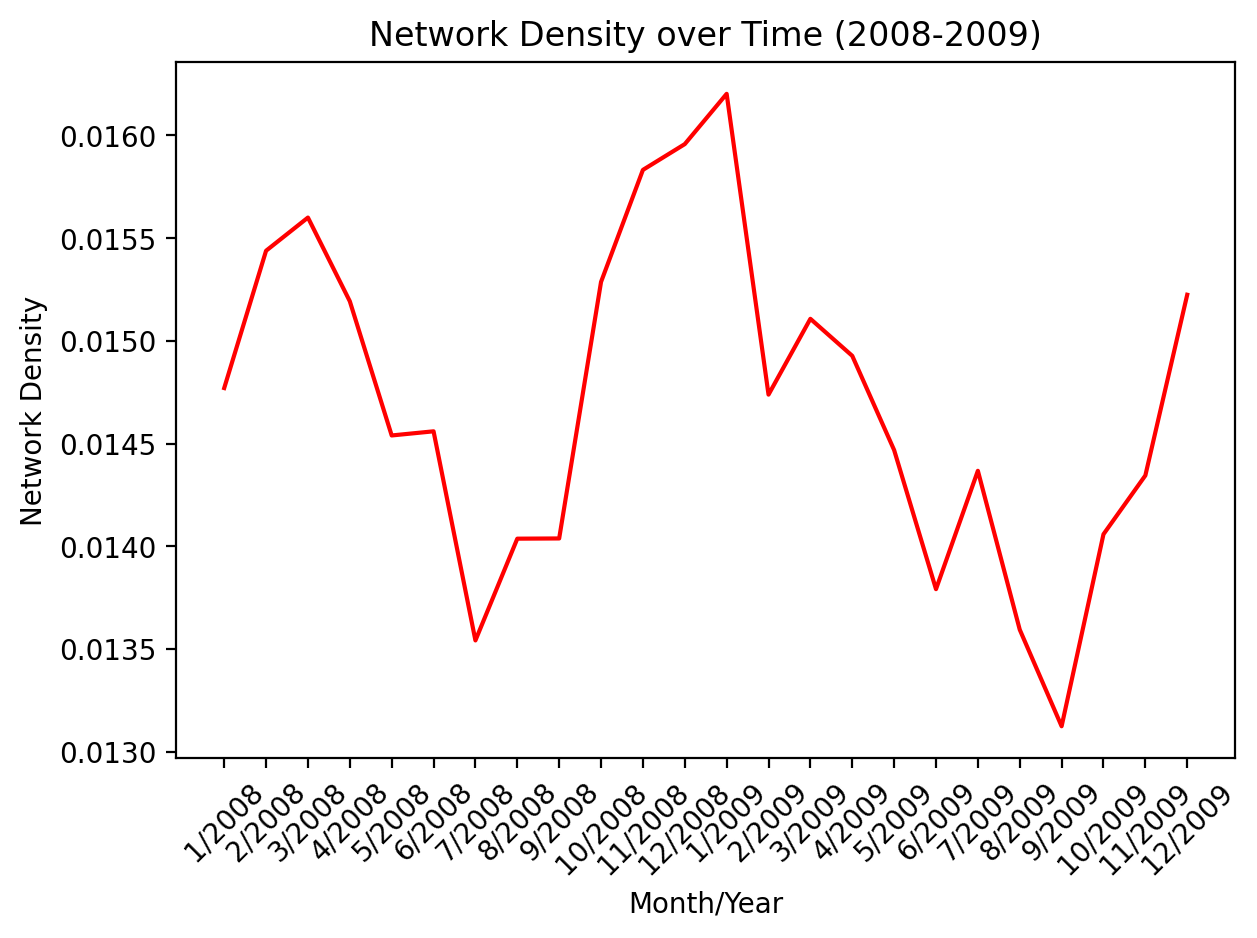

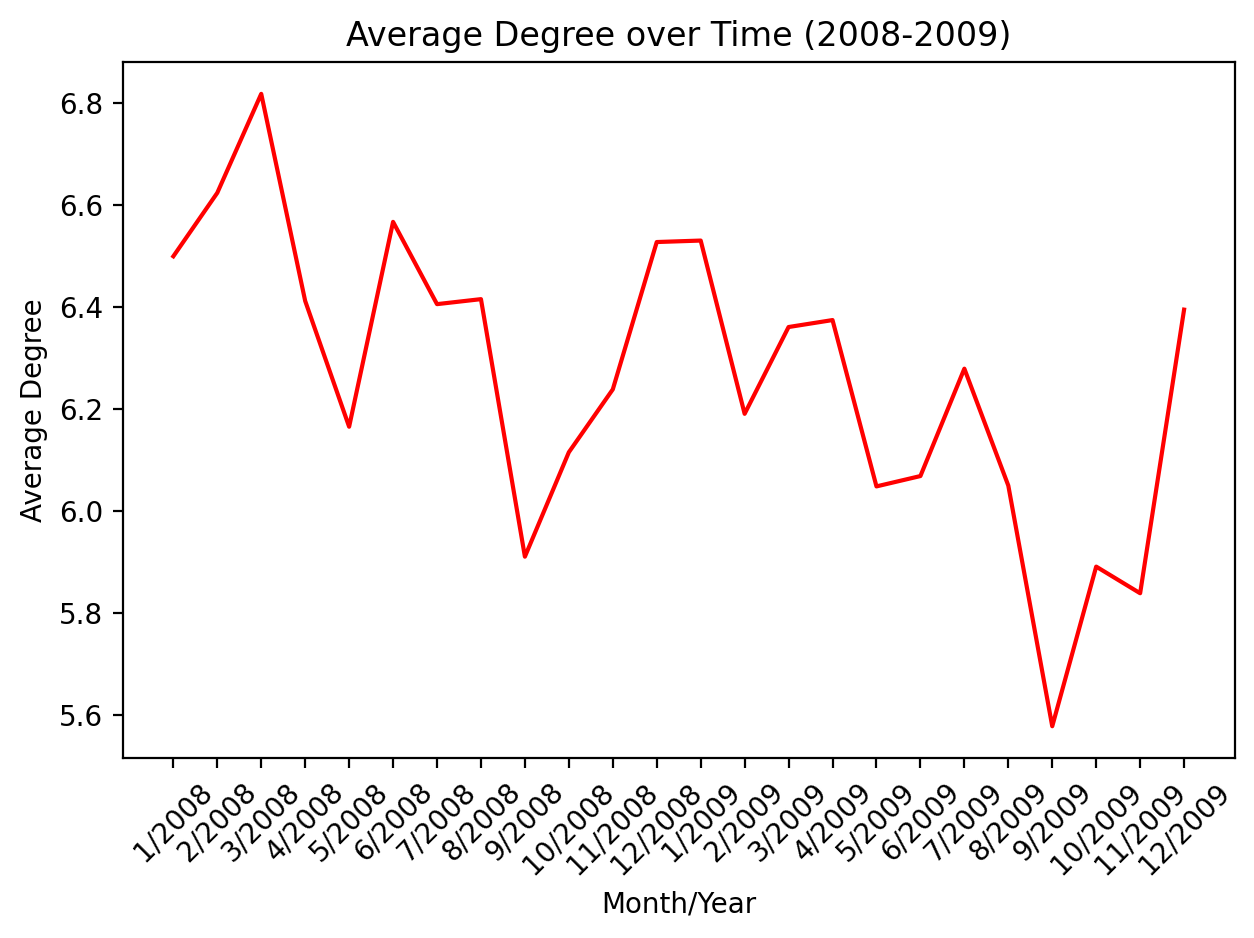

In [41]:
df_2008_2009 = pass_travel_data[pass_travel_data['Year'].isin([2008, 2009])]

df_2008_2009.sort_values(by=['Year', 'Month'], inplace=True)

densities = []

for year in [2008, 2009]:
    for month in range(1, 13):
        monthly_data = df_2008_2009[(df_2008_2009['Year'] == year) & (df_2008_2009['Month'] == month)]

        G = nx.Graph()
        for _, row in monthly_data.iterrows():
            G.add_edge(row['usg_apt'], row['fg_apt'])  

        density = nx.density(G)
        densities.append(density)

months = [f"{month}/{year}" for year in [2008, 2009] for month in range(1, 13)]
plt.plot(months, densities, color='red')  
plt.xlabel('Month/Year')
plt.ylabel('Network Density')
plt.title('Network Density over Time (2008-2009)')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

average_degrees = []

for year in [2008, 2009]:
    for month in range(1, 13):
        monthly_data = df_2008_2009[(df_2008_2009['Year'] == year) & (df_2008_2009['Month'] == month)]

        G = nx.Graph()
        for _, row in monthly_data.iterrows():
            G.add_edge(row['usg_apt'], row['fg_apt'])  

        if len(G.nodes()) > 0:
            avg_degree = sum(dict(G.degree()).values()) / len(G.nodes())
            average_degrees.append(avg_degree)
        else:
            average_degrees.append(0)

months = [f"{month}/{year}" for year in [2008, 2009] for month in range(1, 13)]
plt.plot(months, average_degrees, color='red')  # Change the color as needed
plt.xlabel('Month/Year')
plt.ylabel('Average Degree')
plt.title('Average Degree over Time (2008-2009)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Network Density:
The network density graph of the international airline network during the Great Recession (2008-2009) reveals significant fluctuations. Notably, there is a consistent decline in network density from early 2008 to mid-2009, signifying reduced interconnectivity, possibly due to airlines cutting routes in response to dwindling demand. Sharp drops followed by recoveries at various points may reflect airlines adjusting capacities for seasonal demand or cost-cutting measures. The steepest decline occurs towards the end of 2008 and early 2009, coinciding with the peak of the financial crisis. The gradual recovery from mid-2009 indicates a slow industry rebound. 

Average Degree: 
The average degree graph for the international airline network during the Great Recession (2008-2009) offers valuable insights into airport connectivity. Initially, there's a decline in average degree in early 2008, suggesting airlines were trimming less profitable routes. Throughout 2008, the graph exhibits volatility but shows an upward trend later in the year, likely reflecting network adjustments to changing demand and economic conditions. A sharp drop in early 2009 corresponds to significant network contraction amid economic challenges. From mid-2009, a recovery is visible, indicating airlines were cautiously resuming operations. 

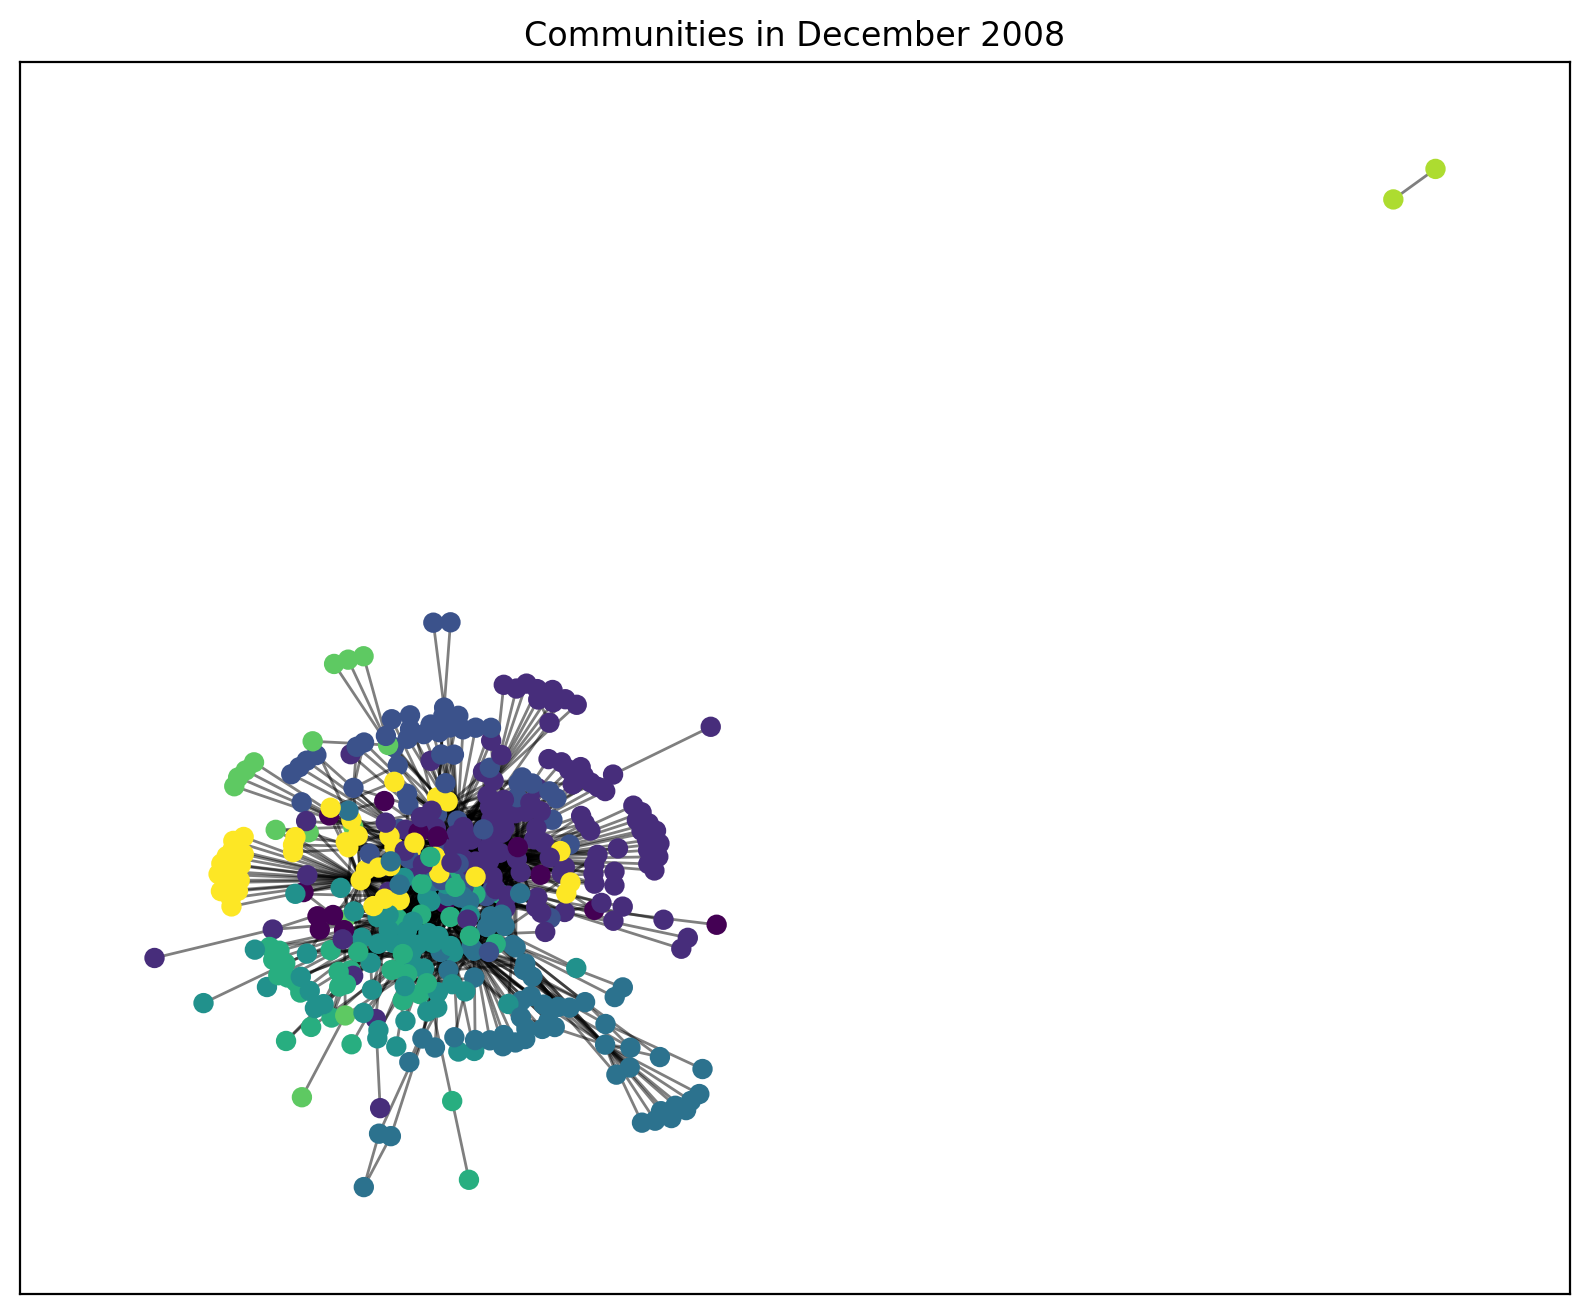

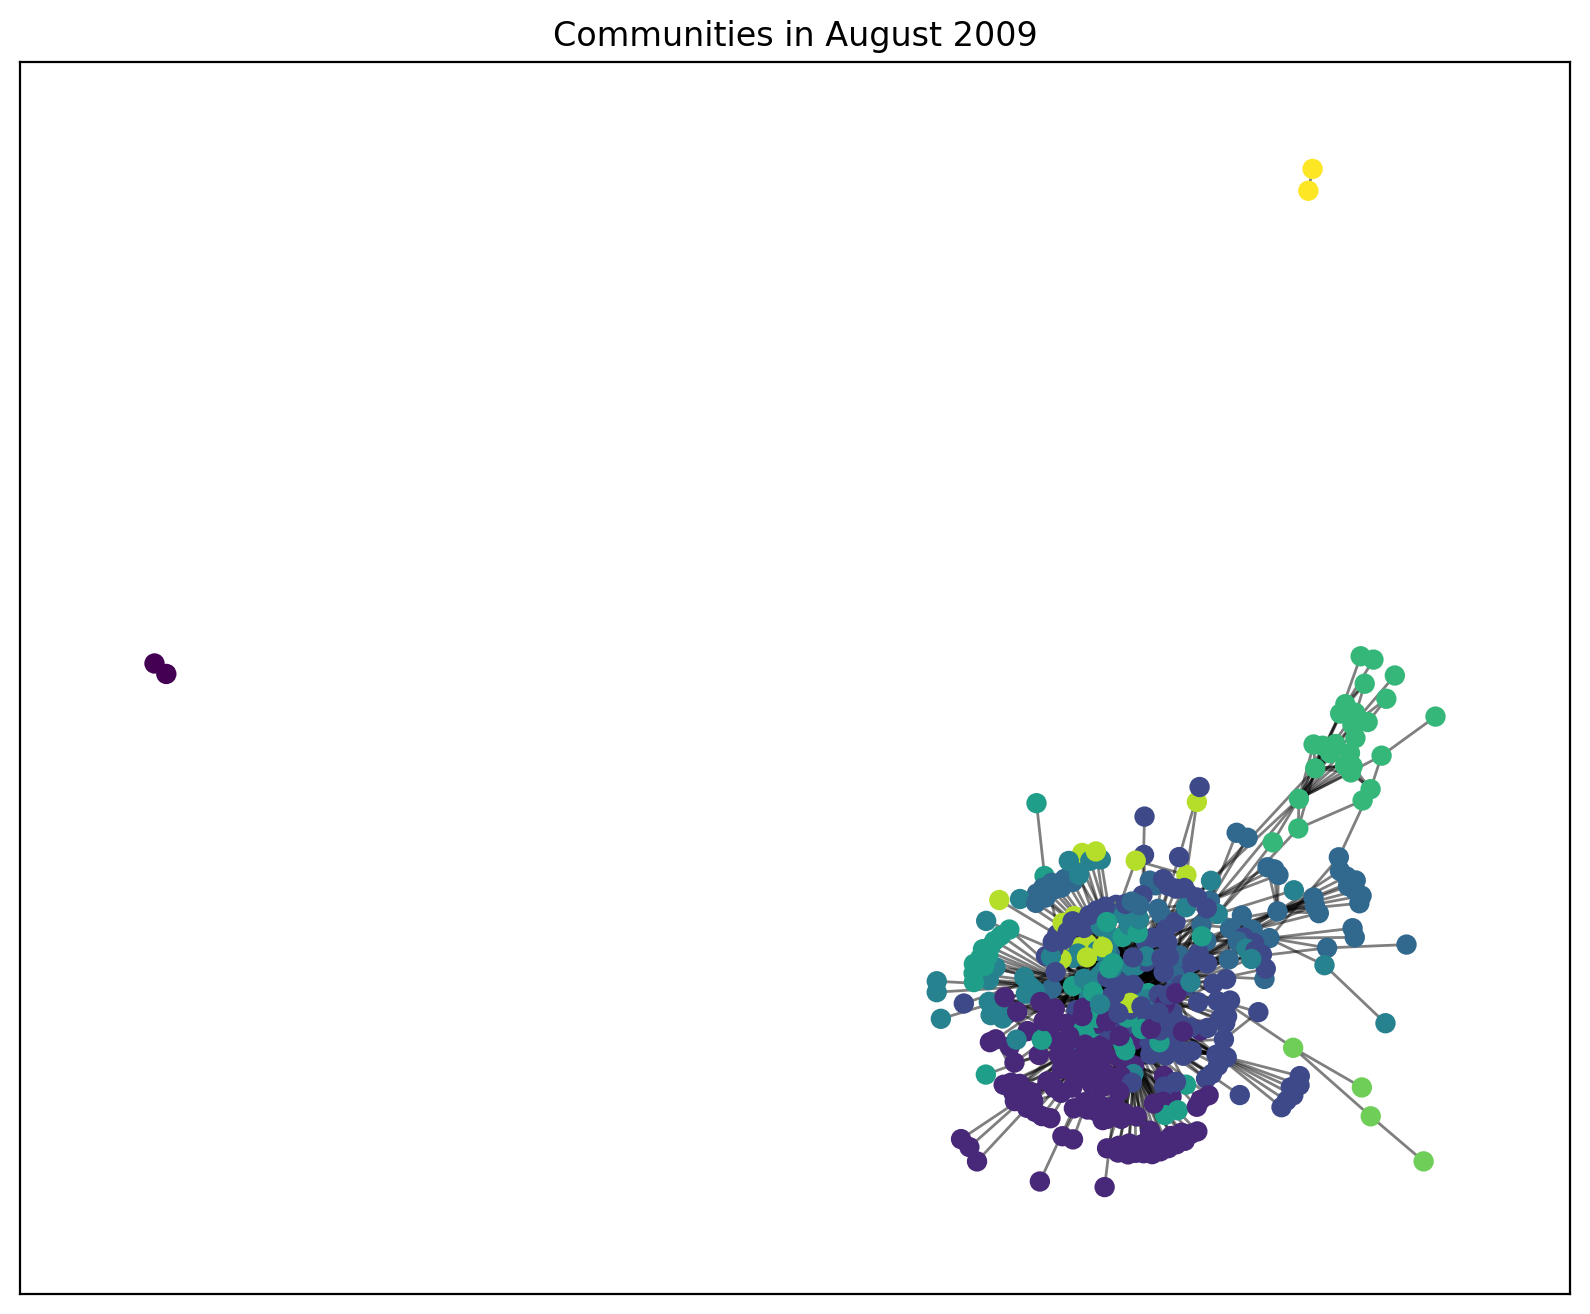

In [42]:
import community as community_louvain

def create_graph_for_month_and_year(df, year, month):
    G = nx.Graph()
    monthly_data = df[(df['Year'] == year) & (df['Month'] == month)]
    for _, row in monthly_data.iterrows():
        G.add_edge(row['usg_apt'], row['fg_apt'])
    return G

def detect_communities(G):
    partition = community_louvain.best_partition(G)
    return partition

G_jan_2019 = create_graph_for_month_and_year(pass_travel_data, 2008, 12)
G_jul_2020 = create_graph_for_month_and_year(pass_travel_data, 2009, 8)

partition_jan_2019 = detect_communities(G_jan_2019)
partition_jul_2020 = detect_communities(G_jul_2020)

pos_jan_2019 = nx.spring_layout(G_jan_2019)  
pos_jul_2020 = nx.spring_layout(G_jul_2020)  

plt.figure(figsize=(10, 8))
cmap = plt.cm.get_cmap('viridis', max(partition_jan_2019.values()) + 1)
nx.draw_networkx_nodes(G_jan_2019, pos_jan_2019, node_size=40, cmap=cmap, node_color=list(partition_jan_2019.values()))
nx.draw_networkx_edges(G_jan_2019, pos_jan_2019, alpha=0.5)
plt.title('Communities in December 2008')
plt.show()

plt.figure(figsize=(10, 8))
cmap = plt.cm.get_cmap('viridis', max(partition_jul_2020.values()) + 1)
nx.draw_networkx_nodes(G_jul_2020, pos_jul_2020, node_size=40, cmap=cmap, node_color=list(partition_jul_2020.values()))
nx.draw_networkx_edges(G_jul_2020, pos_jul_2020, alpha=0.5)
plt.title('Communities in August 2009')
plt.show()


We can observe that:<br>

Communities in December 2008: <br>
• The network shows a densely connected core with multiple communities, indicated by various colors. This suggests that despite the economic downturn beginning in 2008, the network maintained a relatively interconnected structure with multiple active routes.<br>
• There are a few isolated nodes far from the network's core, which could represent airports that had significantly fewer connections and possibly faced reduced flight operations.<br>
• The presence of small, separate clusters might indicate specialized routes that persisted despite overall industry downturns, possibly due to essential travel or sustained demand on specific routes.<br><br>

Communities in August 2009:<br>
• By August 2009, the network's core appears to have fewer communities, suggesting consolidation. This could be due to airlines reducing the number of routes and focusing on maintaining major, profitable connections.<br>
• The network seems less dense, with fewer peripheral nodes, indicating a reduction in the overall number of active routes.
• The isolated nodes seem to represent outliers or airports that were particularly hard hit by reduced flight operations, potentially due to airlines focusing on core routes to larger hubs.<br>


Thus, between December 2008 and August 2009, the network shifted from a relatively interconnected structure with many small communities to a more consolidated and possibly centralized network. This suggests that airlines may have streamlined their operations to cope with the economic conditions. The consolidation could also reflect airlines' strategies to reduce costs by focusing on core routes and hubs, leading to a decrease in direct flights to smaller, less central airports. The changes in community structure may correlate with changes in ticket pricing strategies. As airlines reduced the number of flights, ticket prices for remaining flights could have been adjusted in response to changing supply and demand dynamics.

<span style="font-size: 1.2em;">COVID-19 Pandemic</span><br>
During Covid-19 Pandemic, we saw global air travel industry getting majorly impacted by the reduction in demand and the national lockdowns. The airline routes changed, i.e. reduced directly driving down the airline ticket prices during this time. 
Reference:
https://static1.squarespace.com/static/61b53e492ea58d13b806ccb3/t/61bb82ee337d26672b694f04/1639678703209/Airline_Fare_4-13-2021.pdf

In [ ]:
pip install networkx python-louvain


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 204 kB 1.8 MB/s            
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for python-louvain, since package 'wheel' is not installed.
    Running setup.py install for python-louvain ... done
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


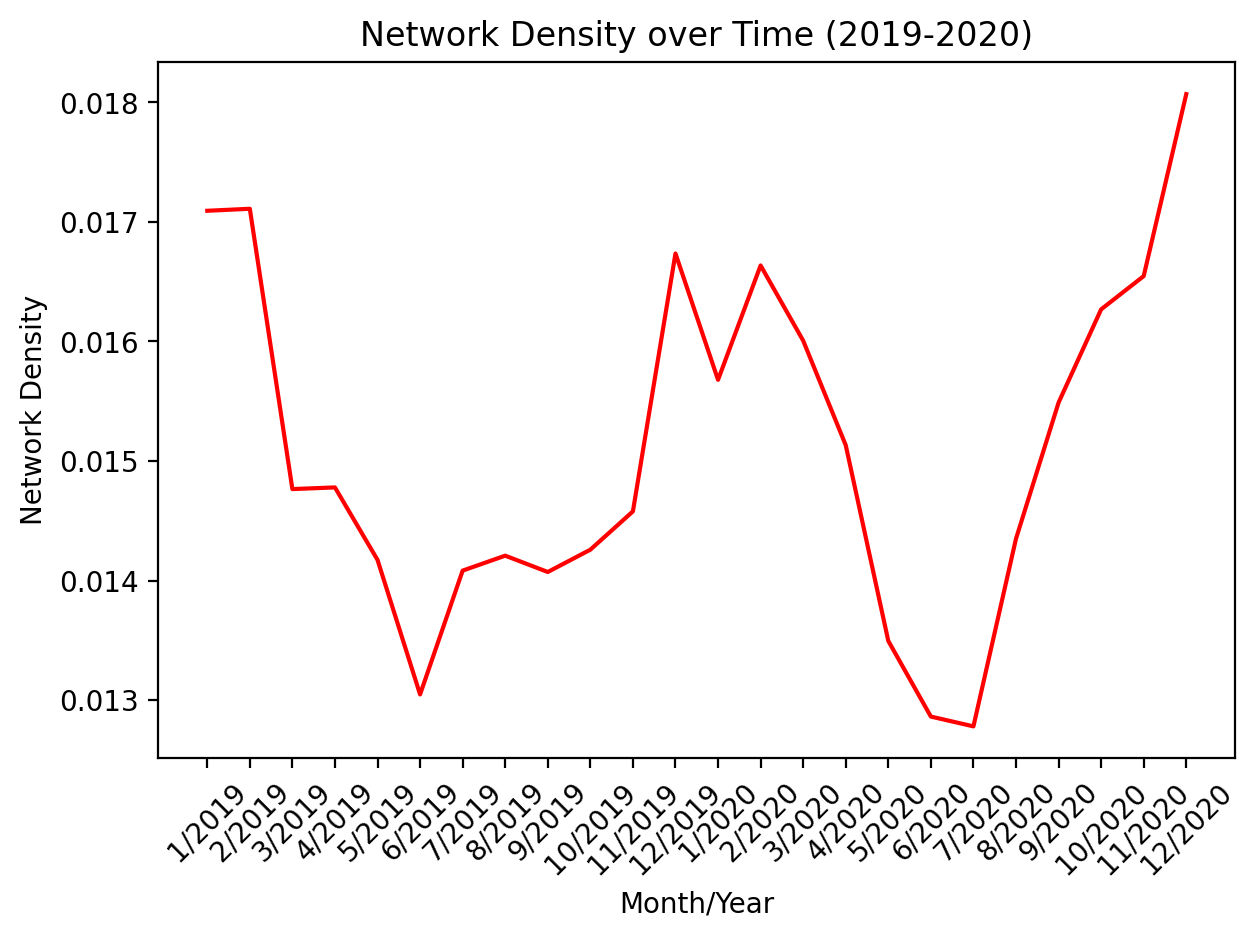

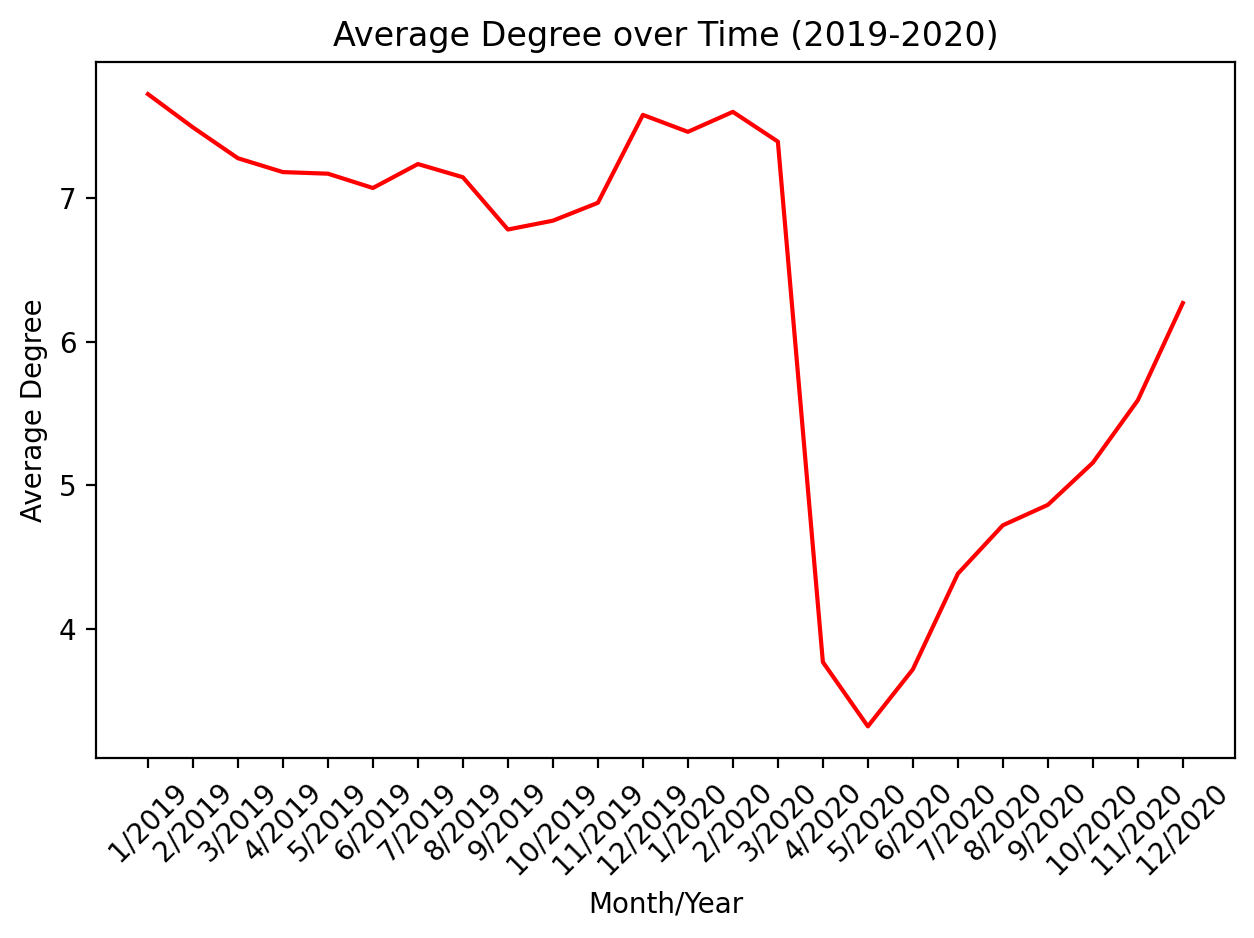

In [ ]:
df_2019_2020 = pass_travel_data[pass_travel_data['Year'].isin([2019, 2020])]

df_2019_2020.sort_values(by=['Year', 'Month'], inplace=True)

densities = []

for year in [2019, 2020]:
    for month in range(1, 13):
        monthly_data = df_2019_2020[(df_2019_2020['Year'] == year) & (df_2019_2020['Month'] == month)]

        G = nx.Graph()
        for _, row in monthly_data.iterrows():
            G.add_edge(row['usg_apt'], row['fg_apt'])  

        density = nx.density(G)
        densities.append(density)

months = [f"{month}/{year}" for year in [2019, 2020] for month in range(1, 13)]
plt.plot(months, densities, color='red')  
plt.xlabel('Month/Year')
plt.ylabel('Network Density')
plt.title('Network Density over Time (2019-2020)')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

average_degrees = []

for year in [2019, 2020]:
    for month in range(1, 13):
        monthly_data = df_2019_2020[(df_2019_2020['Year'] == year) & (df_2019_2020['Month'] == month)]

        G = nx.Graph()
        for _, row in monthly_data.iterrows():
            G.add_edge(row['usg_apt'], row['fg_apt'])  

        if len(G.nodes()) > 0:
            avg_degree = sum(dict(G.degree()).values()) / len(G.nodes())
            average_degrees.append(avg_degree)
        else:
            average_degrees.append(0)

months = [f"{month}/{year}" for year in [2019, 2020] for month in range(1, 13)]
plt.plot(months, average_degrees, color='red')  # Change the color as needed
plt.xlabel('Month/Year')
plt.ylabel('Average Degree')
plt.title('Average Degree over Time (2019-2020)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Network Density:<br>
The network density graph for the airline network during the COVID-19 pandemic period (2019-2020) displays notable variations in network connectivity. Initially stable in early 2019, the graph shows a gradual decline from mid-2019, signaling route reductions as airlines react to emerging pandemic concerns. At the start of 2020, a sharp drop corresponds to the pandemic's global recognition, indicating widespread flight cancellations and route suspensions. A slight recovery in mid-2020 follows as airlines adapt to new travel protocols. Late 2020 sees a noticeable increase in network density, possibly due to eased restrictions or route reinstatements. 

Average Degree: <br>
The average degree graph of the airline network during the COVID-19 pandemic (2019-2020) highlights significant shifts in airport connectivity. Initially, 2019 shows a stable average degree, reflecting consistent connectivity. In early 2020, there's a sharp drop, indicating airports lost connections due to pandemic-related flight cancellations and restrictions. The lowest point occurs around April to May 2020, aligning with the first pandemic wave's peak. Mid-2020 witnesses a gradual recovery as airlines cautiously resume operations. Late 2020 sees a substantial rebound, possibly due to route restoration or holiday travel. Reduced connectivity initially may have led to higher ticket prices, but overall demand decline forced price reductions. This graph illustrates the airline industry's adaptability amid pandemic uncertainties.

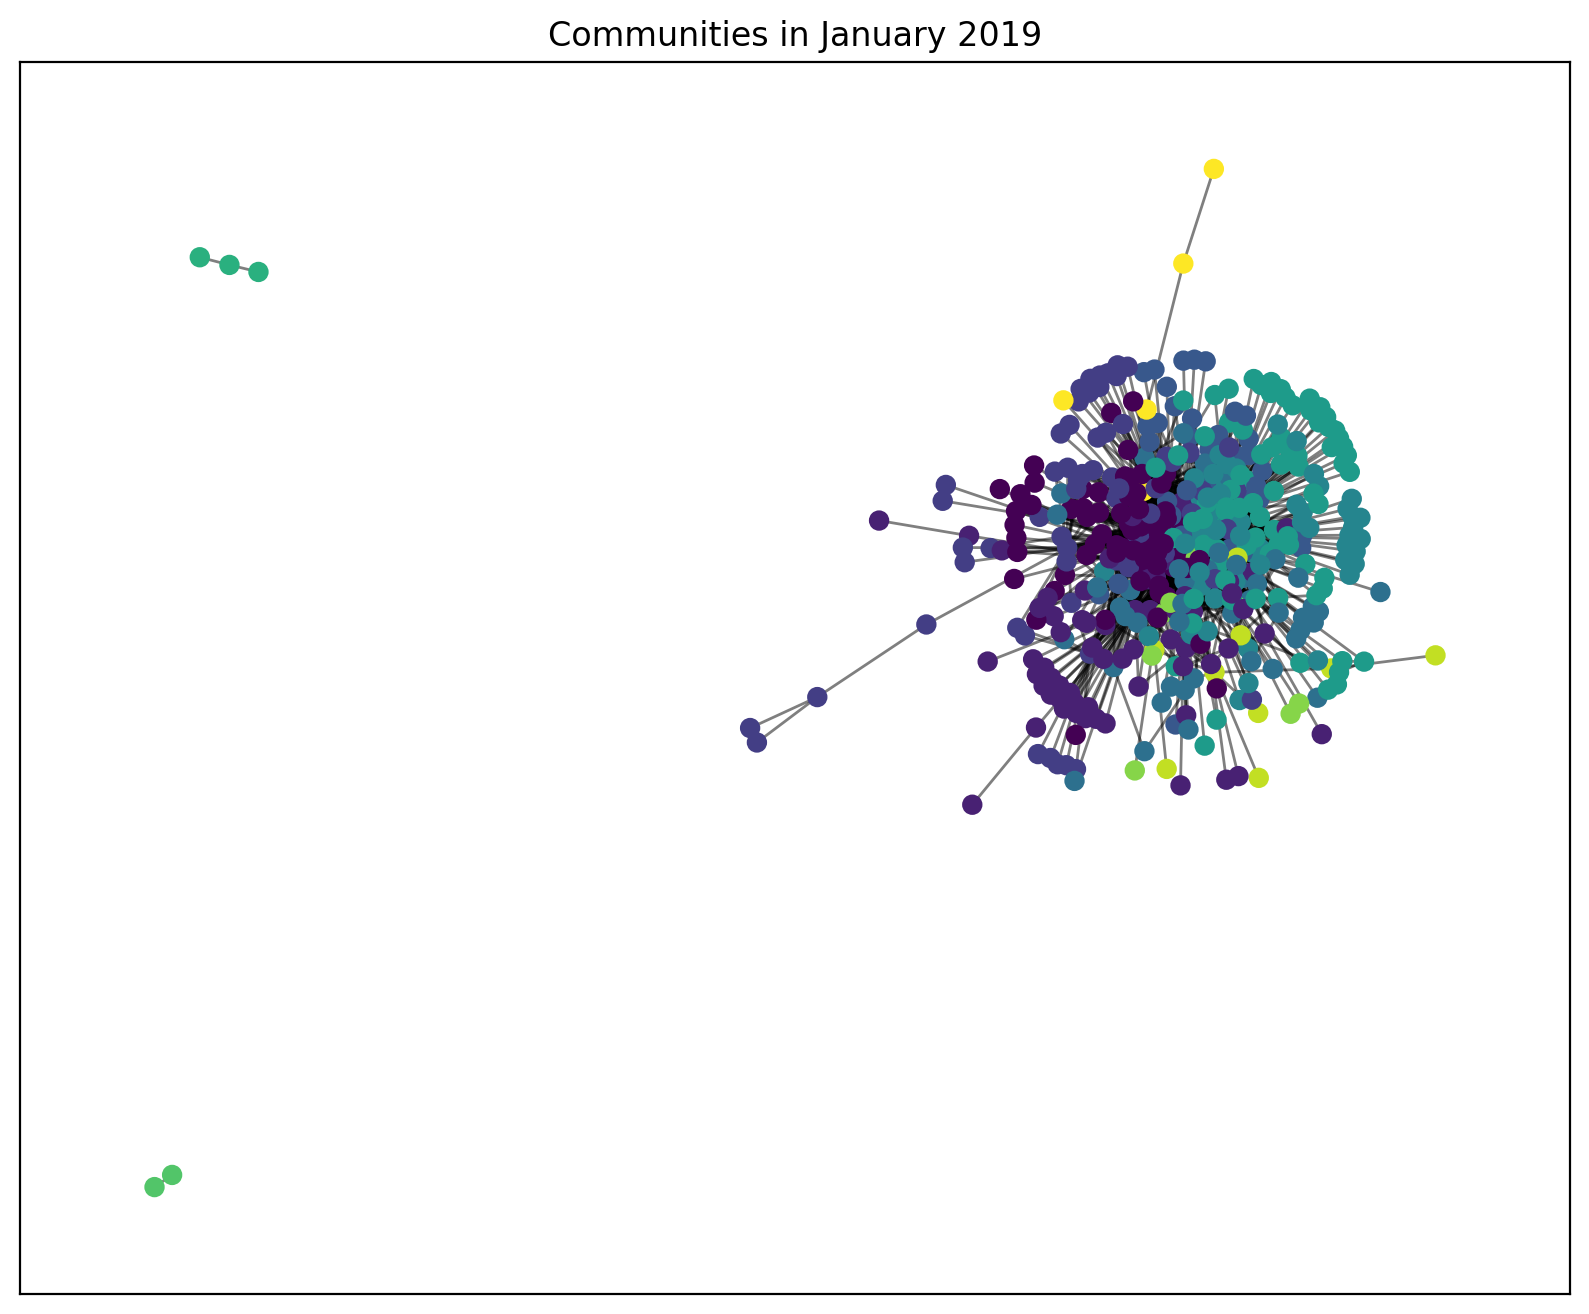

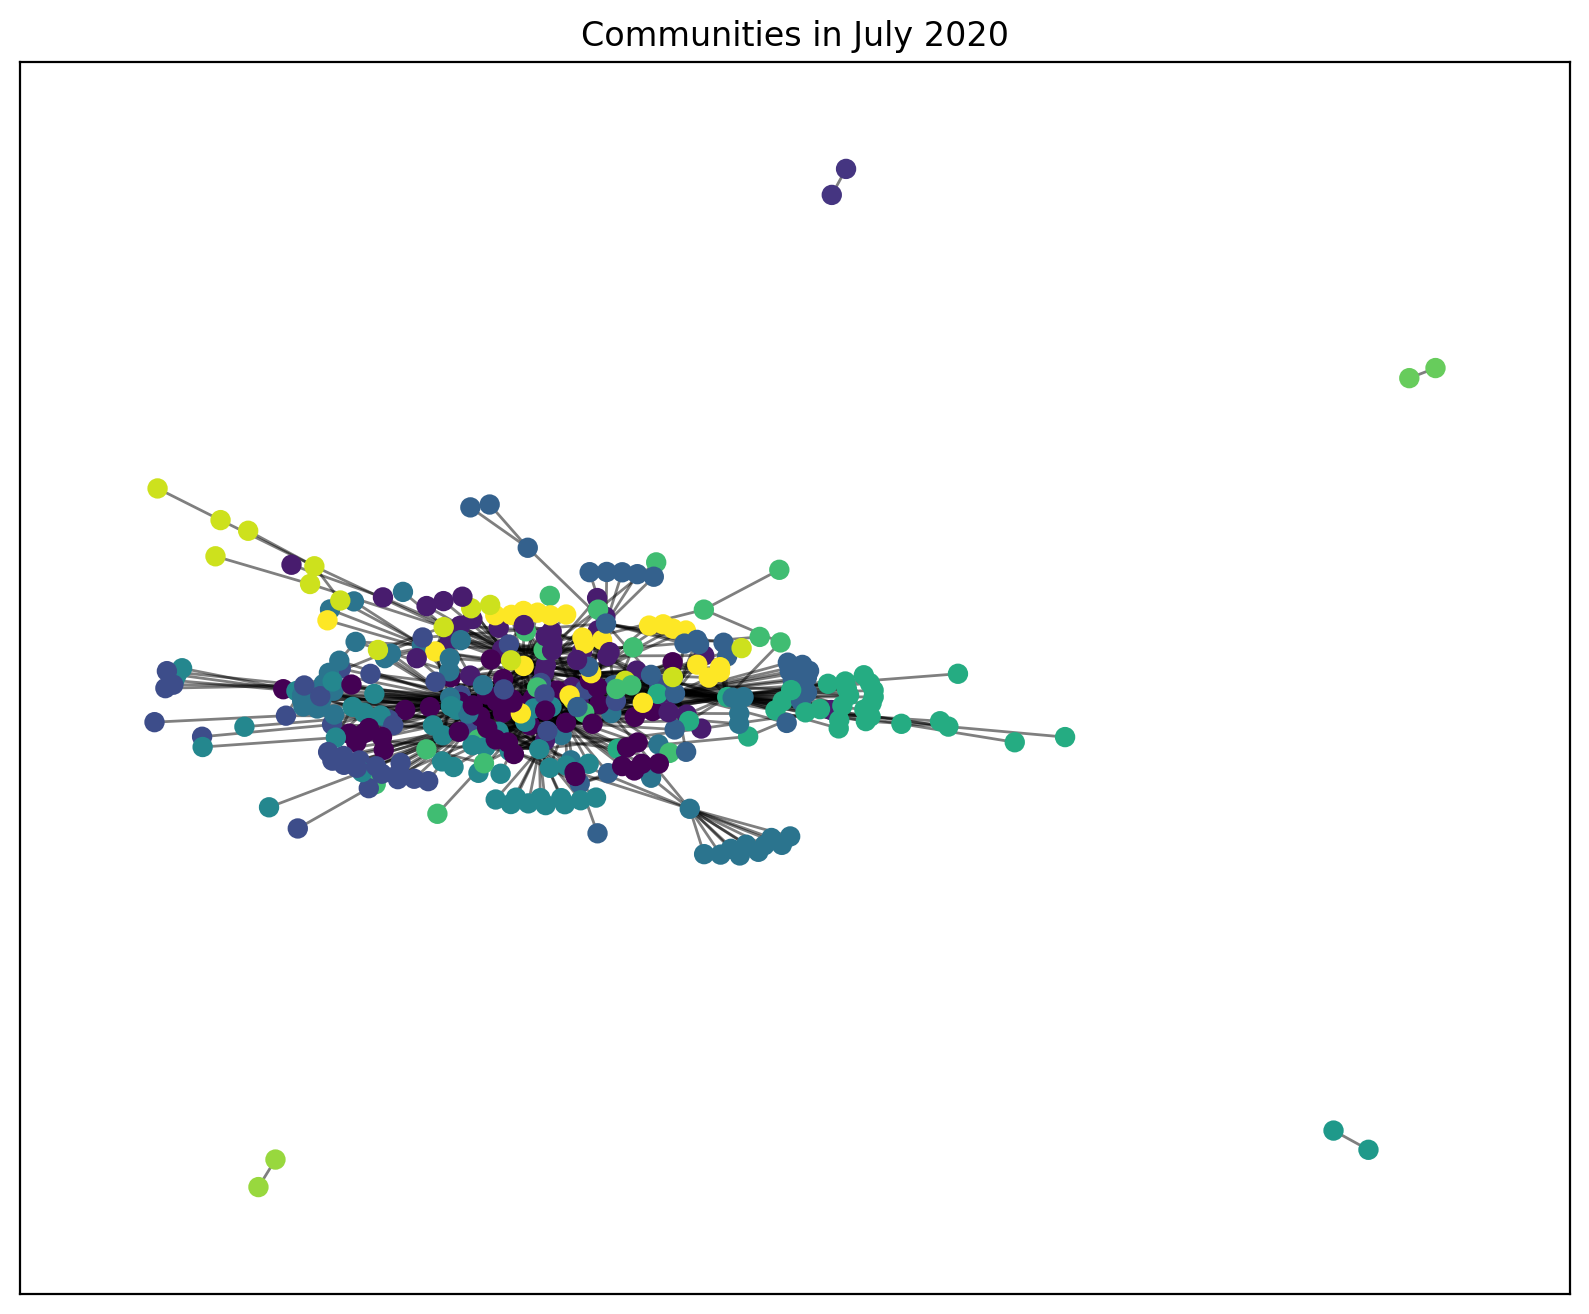

In [38]:
import community as community_louvain

def create_graph_for_month_and_year(df, year, month):
    G = nx.Graph()
    monthly_data = df[(df['Year'] == year) & (df['Month'] == month)]
    for _, row in monthly_data.iterrows():
        G.add_edge(row['usg_apt'], row['fg_apt'])
    return G

def detect_communities(G):
    partition = community_louvain.best_partition(G)
    return partition

G_jan_2019 = create_graph_for_month_and_year(pass_travel_data, 2019, 1)
G_jul_2020 = create_graph_for_month_and_year(pass_travel_data, 2020, 7)

partition_jan_2019 = detect_communities(G_jan_2019)
partition_jul_2020 = detect_communities(G_jul_2020)

pos_jan_2019 = nx.spring_layout(G_jan_2019)  
pos_jul_2020 = nx.spring_layout(G_jul_2020)  

plt.figure(figsize=(10, 8))
cmap = plt.cm.get_cmap('viridis', max(partition_jan_2019.values()) + 1)
nx.draw_networkx_nodes(G_jan_2019, pos_jan_2019, node_size=40, cmap=cmap, node_color=list(partition_jan_2019.values()))
nx.draw_networkx_edges(G_jan_2019, pos_jan_2019, alpha=0.5)
plt.title('Communities in January 2019')
plt.show()

plt.figure(figsize=(10, 8))
cmap = plt.cm.get_cmap('viridis', max(partition_jul_2020.values()) + 1)
nx.draw_networkx_nodes(G_jul_2020, pos_jul_2020, node_size=40, cmap=cmap, node_color=list(partition_jul_2020.values()))
nx.draw_networkx_edges(G_jul_2020, pos_jul_2020, alpha=0.5)
plt.title('Communities in July 2020')
plt.show()


We can make the following observations: <br>

Communities in 2019: <br>
• The network has a densely connected core where a large community is evident, with several smaller communities around it. <br>
• There are various peripheral nodes with fewer connections, possibly representing less frequented airports or those with fewer direct flights. <br>
• The color variation within the central cluster could indicate multiple closely interlinked communities, suggesting a robust set of routes connecting different regions. <br>

Communities in 2020: <br>
• The central community appears more compact, potentially indicating a reduction in the number of flights and routes due to the impact of the COVID-19 pandemic. <br>
• There is a noticeable decrease in the size and number of peripheral communities, which could imply that many routes, especially international or less profitable ones, were cut. <br>
• The network seems to have fewer nodes overall, which might reflect the cessation of operations at some airports or the removal of certain routes from the network. <br>


The network in 2020 seems more concentrated with fewer, more centralized communities, which could indicate a consolidation of routes among fewer, larger hubs. The presence of isolated nodes in both years could indicate airports that were temporarily disconnected from the network due to various reasons, including economic or pandemic-related disruptions. The contraction from 2019 to 2020 could be attributed to airlines reducing their operations in response to decreased demand and travel restrictions. In 2019, the more extensive network suggests more competition and possibly more pricing variability. In contrast, the consolidation in 2020 lead to less competition on certain routes, potentially resulting in higher prices or more standardized pricing among the remaining operational routes. 